In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv('./data/final_data_after_winsorization.csv', index_col='행정동명')
data.fillna(0, inplace=True)
data.head(2)

2023년09월_전체세대  2023년09월_1인세대  2023년09월_2인세대  2023년09월_3인세대  \
행정동명                                                               
가락1동           9836           1633           2492           2706   
가락2동          12375           3568           2746           2825   

      2023년09월_4인세대  2023년09월_5인세대  2023년9월_6인가구이상  채소가게수  제로웨이스트 가게수  유치원수  \
행정동명                                                                          
가락1동           2438            449             118   10.0         0.0   1.0   
가락2동           2641            453             142    3.0         0.0   4.0   

      ...  총_20_30대_(수)  총_40_50대_(수)  총_60대이상_(수)     총_10대  총_20_30대  \
행정동명  ...                                                                
가락1동  ...         15010         17080        11642  0.095664  0.272572   
가락2동  ...         17364         20426        14158  0.104766  0.277141   

      총_40_50대   총_60대이상  유치원_초등학교_(수)  유치원_초등학교  거주_유동_인구당_매출액  
행정동명                                                             
가락1동  0.310162  0.211411           3.0  0.000054      26.850496  
가락2동  0.326013  0.225971           6.0  0.000096      35.834189  

[2 rows x 63 columns]

In [4]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']
data = data[features]
print(f'사용하는 컬럼수: {len(features)}개')

사용하는 컬럼수: 14개


## 스케일링

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))
scaled_df.index = data.index
scaled_df.columns = data.columns
scaled_df.head(2)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
가락1동  0.014204  0.076923          0.0       0.025989  0.116279         0.0   
가락2동  0.014204  0.346154          0.0       0.035016  0.034884         0.0   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
가락1동      0.085682  0.105911  0.125300  0.639775  0.426207  0.408414   
가락2동      0.088504  0.182266  0.220257  0.745585  0.466991  0.415310   

       총_60대이상      1인세대  
행정동명                      
가락1동  0.457904  0.112284  
가락2동  0.489702  0.269226

## PCA
- https://www.statology.org/scree-plot-python/

In [6]:
# 주성분
# 주성분 = 특성들의 값을 곱하여 만들어진 축
# 주성분 하나의 각각의 특성들에 곱해지는 값은 가중치(중요도)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)
pca.fit(scaled_df)
pca_result = pd.DataFrame((pca.transform(scaled_df)))

num_of_principal = pca_result.shape[1] 
print('주성분의 개수:', num_of_principal)
print(pca.explained_variance_ratio_)
pca_result.index = data.index
pca_result.head(2)

주성분의 개수: 6
[0.30314721 0.24872725 0.11136909 0.07746297 0.05712224 0.04575501]


0         1         2         3         4         5
행정동명                                                            
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808

scree plot

In [8]:
pca.n_components_

6

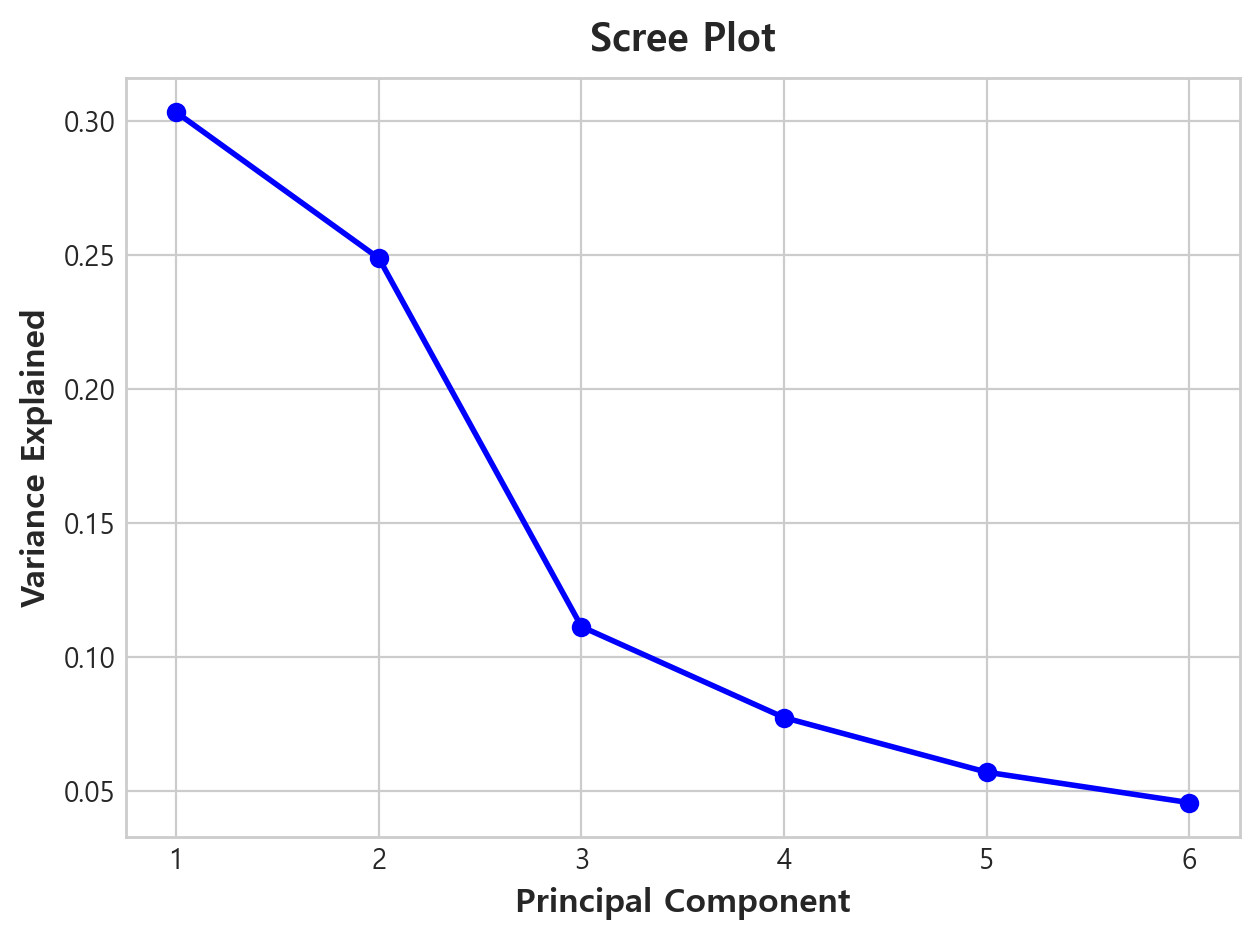

In [9]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [10]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

주성분의 설명력
제 1주성분 : 0.3031472103177469
제 2주성분 : 0.24872724867827828
제 3주성분 : 0.11136909342828541
제 4주성분 : 0.07746296789446064
제 5주성분 : 0.057122236866911584
제 6주성분 : 0.04575500769808147


In [11]:
pca_result_T = pca_result.reset_index().copy()
pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]
pca_result_T.columns

Index(['V_행정동명', 'V_0', 'V_1', 'V_2', 'V_3', 'V_4', 'V_5'], dtype='object')

<Axes: xlabel='V_0', ylabel='V_1'>

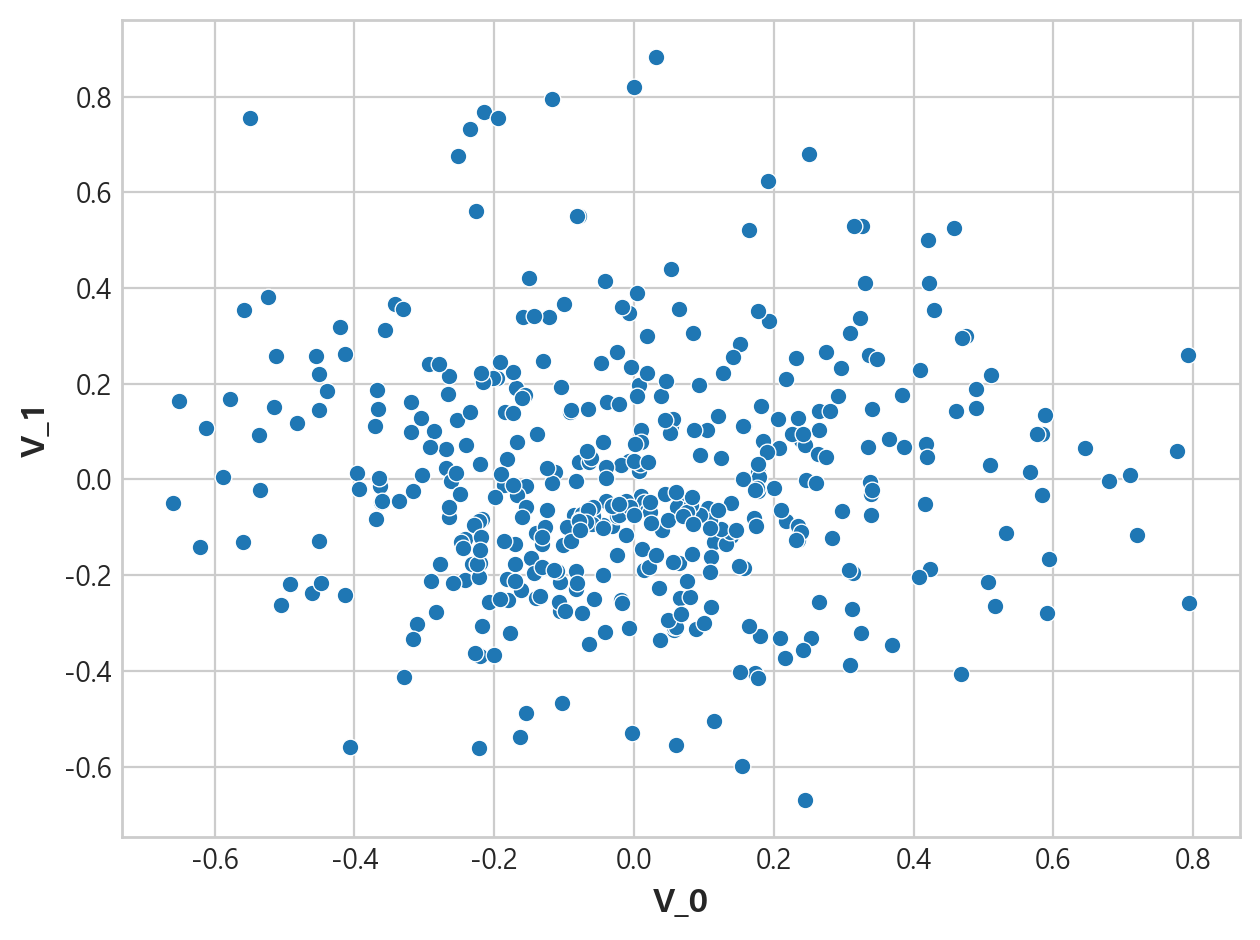

In [12]:
import seaborn as sns
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1')

In [13]:
pca_result_T.sort_values('V_0').head(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
394           필동 -0.660355 -0.048411  0.392070  0.419604 -0.405873 -0.258607
312         을지로동 -0.651767  0.163756  0.220484 -0.109212 -0.054113  0.107380
91          둔촌1동 -0.621720 -0.141444  0.188045 -0.126260 -0.362875  0.062102
3           가리봉동 -0.612605  0.107408 -0.156476  0.051506 -0.025351 -0.021620
345          장충동 -0.588089  0.006152  0.046064  0.049316 -0.261756 -0.098729
355      종로5.6가동 -0.578160  0.168944  0.107180  0.136420 -0.083988 -0.061397
376         창신1동 -0.560045 -0.131278 -0.074370  0.290240 -0.024362 -0.121399
30           광희동 -0.557756  0.354156  0.122425 -0.089660  0.216152  0.137628
354  종로1.2.3.4가동 -0.549133  0.754336  1.115468  0.628705  0.727712 -0.291113
239          신당동 -0.536105  0.093052 -0.034269  0.033063 -0.062439 -0.028168

In [14]:
pca_result_T.sort_values('V_0').tail(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
27    공릉2동  0.587460  0.135497  0.110950  0.127214 -0.214893 -0.048784
332   잠실2동  0.591298 -0.279213  0.125718 -0.294675 -0.033904 -0.133076
46    길음1동  0.594345 -0.167067  0.168555  0.002972 -0.079718 -0.082798
141   방화1동  0.645798  0.065415  0.031344  0.130048 -0.090087  0.134765
302   우장산동  0.679094 -0.004029  0.031780 -0.059384 -0.016090 -0.015123
259   신정3동  0.710345  0.008414  0.075882  0.230704 -0.110123  0.055720
310    위례동  0.719739 -0.116289  0.153284 -0.205296 -0.109415 -0.144933
370    진관동  0.776705  0.060339  0.292117  0.258947 -0.075628  0.045717
275   양재1동  0.793389  0.260735  0.365653  0.408048 -0.068085  0.375711
116    목5동  0.794465 -0.258356  0.223936 -0.020476 -0.151098 -0.074822

In [15]:
pca_result_T.sort_values('V_1').head(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
72    대치1동  0.244730 -0.669822  0.401472 -0.193157  0.023805  0.081461
126   반포2동  0.154866 -0.598937  0.253340 -0.245032 -0.036020 -0.043987
111   명일2동 -0.221879 -0.561661  0.410790  0.097726 -0.351088 -0.127095
15    개포1동 -0.406954 -0.559747  0.268320 -0.067676 -0.161930  0.055800
21    고덕1동  0.060718 -0.554496  0.201624 -0.070921 -0.069312 -0.002494
336   잠실7동 -0.163287 -0.537135  0.061103  0.013403  0.028082 -0.032317
327   일원본동 -0.002148 -0.529100  0.347970  0.024587 -0.169427  0.108888
292    오륜동  0.115086 -0.505157  0.225405 -0.125293  0.023162 -0.077241
117    무악동 -0.155221 -0.487748  0.067484 -0.054434  0.048791 -0.002680
272   암사3동 -0.103116 -0.466800  0.073392 -0.183124  0.081611  0.151633

In [16]:
pca_result_T.sort_values('V_1').tail(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
386          청룡동  0.191352  0.623837 -0.121172 -0.082242 -0.270960  0.042787
417          화양동 -0.251832  0.675537  0.019692 -0.315194 -0.301797 -0.067263
5           가양1동  0.250883  0.679489  0.192243 -0.057842 -0.158608  0.190651
243          신림동 -0.234859  0.731466 -0.128165 -0.346779 -0.269404  0.029122
354  종로1.2.3.4가동 -0.549133  0.754336  1.115468  0.628705  0.727712 -0.291113
280         역삼1동 -0.194931  0.755175  0.482299 -0.159764  0.119474 -0.021548
263          신촌동 -0.214869  0.766856  0.429921 -0.092462 -0.134007 -0.167616
4            가산동 -0.117360  0.795470  0.181084 -0.224243  0.009892 -0.060995
287         영등포동 -0.000651  0.819616  0.225447 -0.078702 -0.021299 -0.154315
189          서교동  0.031945  0.882373  0.650519 -0.093045  0.266645 -0.126773

### interpret PCA
https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html  

create loading

In [17]:
# pd.DataFrame(data=pca.components_, columns=scaled_df.columns).T #아래 코드와 동일한 결과 산출

loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, num_of_principal+1)], index=data.columns)
loadings

PC1       PC2       PC3       PC4       PC5       PC6
미세먼지지수        -0.080590  0.094684  0.296722  0.087117  0.180117 -0.035903
공원수            0.271876  0.090130  0.215702  0.394975 -0.108064  0.799328
도시농업(프로그램수)    0.001329  0.056105  0.146875  0.132258  0.185270 -0.040614
거주_유동_인구당_매출액 -0.110020 -0.060351  0.260936 -0.199340 -0.162421  0.239050
채소가게수          0.009614  0.053731 -0.037048  0.054166  0.052658 -0.034021
제로웨이스트 가게수    -0.008139  0.057883  0.131611  0.039677  0.107375  0.069813
승하차인원_버스_지하철   0.082841  0.304039  0.417959  0.065134  0.371241 -0.275890
카페수            0.026723  0.285493  0.453133 -0.073693  0.211609 -0.044682
유치원_초등학교      -0.094357 -0.190817  0.346881  0.567748 -0.588320 -0.394278
인구수            0.808800  0.349410 -0.205978  0.054206 -0.170197 -0.214050
총_10대          0.299987 -0.334617  0.291244 -0.238621 -0.029185 -0.080464
총_20_30대      -0.088528  0.380717 -0.073748 -0.187551 -0.316336 -0.044626
총_60대이상       -0.050975 -0.066690 -0.337885  0.583311  0.426247 -0.071577
1인세대          -0.369133  0.613252 -0.099368  0.085746 -0.201446  0.044573

loading plot

In [18]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

In [19]:
# # PCA가 2개일 때, 유요한 코드 - loading_plot
# fig, ax = plt.subplots(figsize = (5,5))
# ax[0] = loading_plot(pca.components_.T, data.columns)

loading matrix
- 방법 1

In [20]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(1, num_of_principal+1)], index=data.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5       PC6
미세먼지지수        -0.021819  0.023220  0.048693  0.011923  0.021168 -0.003776
공원수            0.073609  0.022104  0.035397  0.054056 -0.012700  0.084077
도시농업(프로그램수)    0.000360  0.013759  0.024102  0.018101  0.021774 -0.004272
거주_유동_인구당_매출액 -0.029787 -0.014801  0.042820 -0.027282 -0.019089  0.025144
채소가게수          0.002603  0.013177 -0.006080  0.007413  0.006189 -0.003578
제로웨이스트 가게수    -0.002204  0.014195  0.021598  0.005430  0.012619  0.007343
승하차인원_버스_지하철   0.022429  0.074563  0.068588  0.008914  0.043630 -0.029019
카페수            0.007235  0.070014  0.074360 -0.010086  0.024869 -0.004700
유치원_초등학교      -0.025547 -0.046796  0.056924  0.077702 -0.069143 -0.041472
인구수            0.218977  0.085689 -0.033801  0.007419 -0.020003 -0.022515
총_10대          0.081219 -0.082062  0.047794 -0.032658 -0.003430 -0.008464
총_20_30대      -0.023968  0.093367 -0.012102 -0.025668 -0.037178 -0.004694
총_60대이상       -0.013801 -0.016355 -0.055448  0.079832  0.050095 -0.007529
1인세대          -0.099940  0.150394 -0.016306  0.011735 -0.023675  0.004688

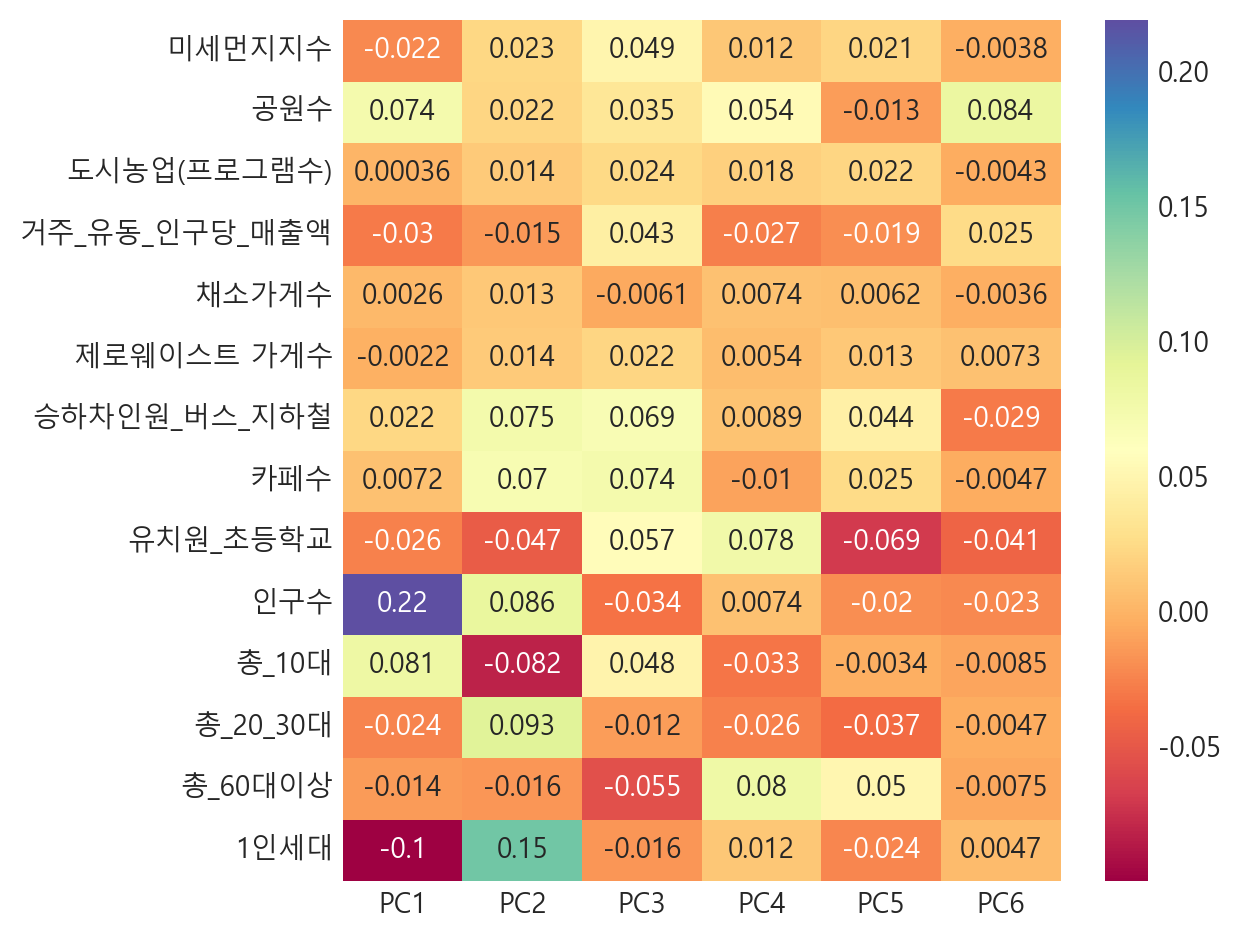

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.show()

- 방법 2

In [22]:
loadings_2 = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings_2)))
loadings_df['variable'] = data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6
variable                                                                 
미세먼지지수        -0.080590  0.094684  0.296722  0.087117  0.180117 -0.035903
공원수            0.271876  0.090130  0.215702  0.394975 -0.108064  0.799328
도시농업(프로그램수)    0.001329  0.056105  0.146875  0.132258  0.185270 -0.040614
거주_유동_인구당_매출액 -0.110020 -0.060351  0.260936 -0.199340 -0.162421  0.239050
채소가게수          0.009614  0.053731 -0.037048  0.054166  0.052658 -0.034021
제로웨이스트 가게수    -0.008139  0.057883  0.131611  0.039677  0.107375  0.069813
승하차인원_버스_지하철   0.082841  0.304039  0.417959  0.065134  0.371241 -0.275890
카페수            0.026723  0.285493  0.453133 -0.073693  0.211609 -0.044682
유치원_초등학교      -0.094357 -0.190817  0.346881  0.567748 -0.588320 -0.394278
인구수            0.808800  0.349410 -0.205978  0.054206 -0.170197 -0.214050
총_10대          0.299987 -0.334617  0.291244 -0.238621 -0.029185 -0.080464
총_20_30대      -0.088528  0.380717 -0.073748 -0.187551 -0.316336 -0.044626
총_60대이상       -0.050975 -0.066690 -0.337885  0.583311  0.426247 -0.071577
1인세대          -0.369133  0.613252 -0.099368  0.085746 -0.201446  0.044573

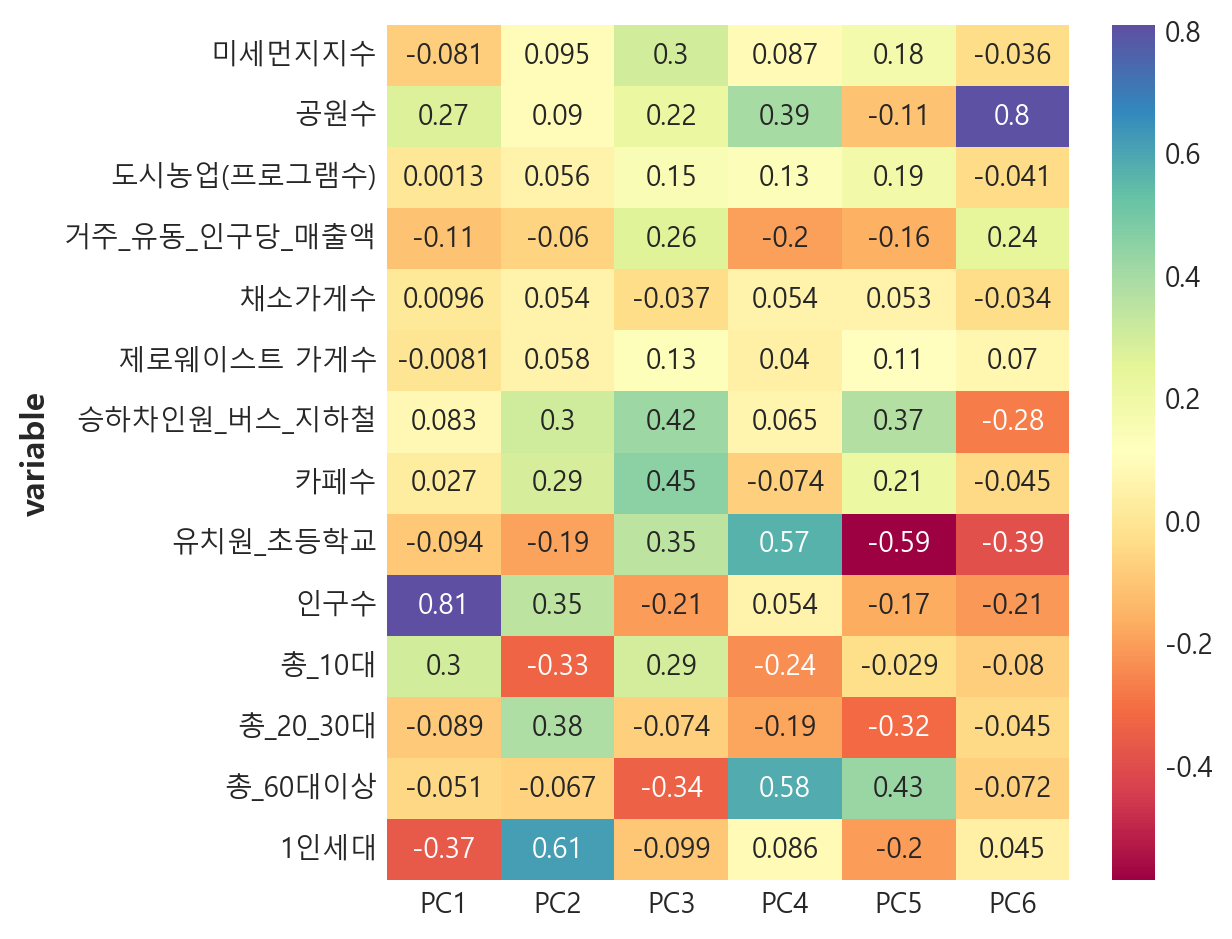

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

## clustering

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

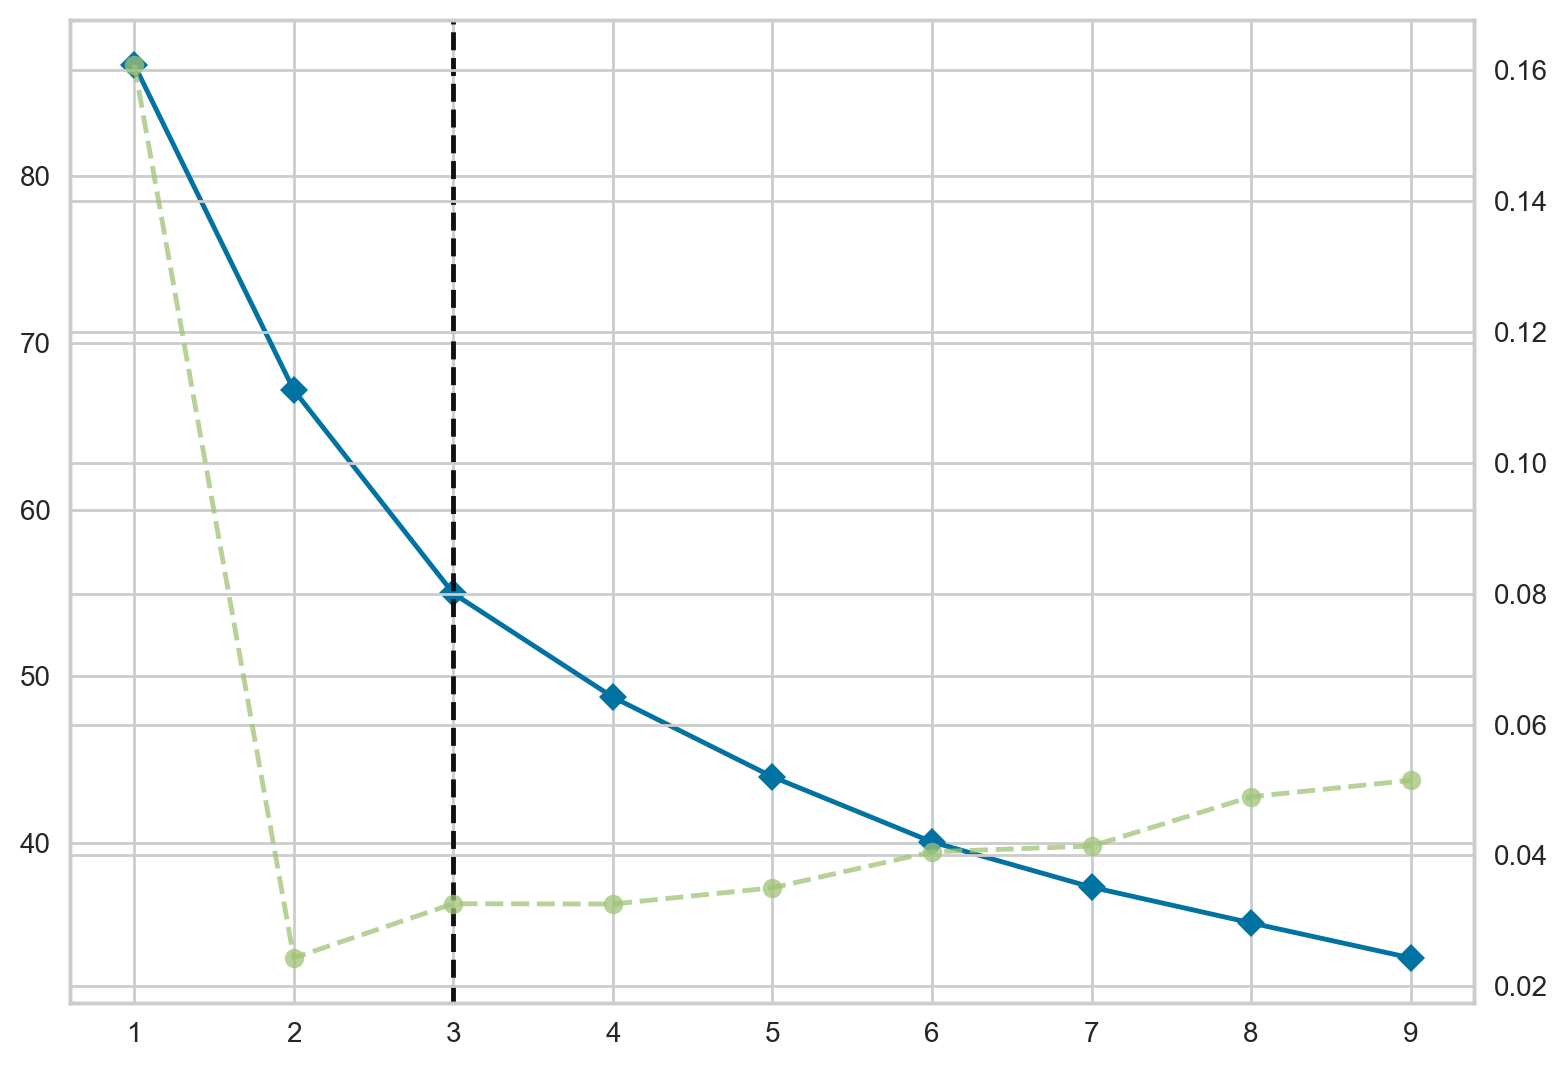

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


#엘보우 최적 클러스터 수 정하기
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10), n_init=10)
visualizer.fit(pca_result)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [26]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

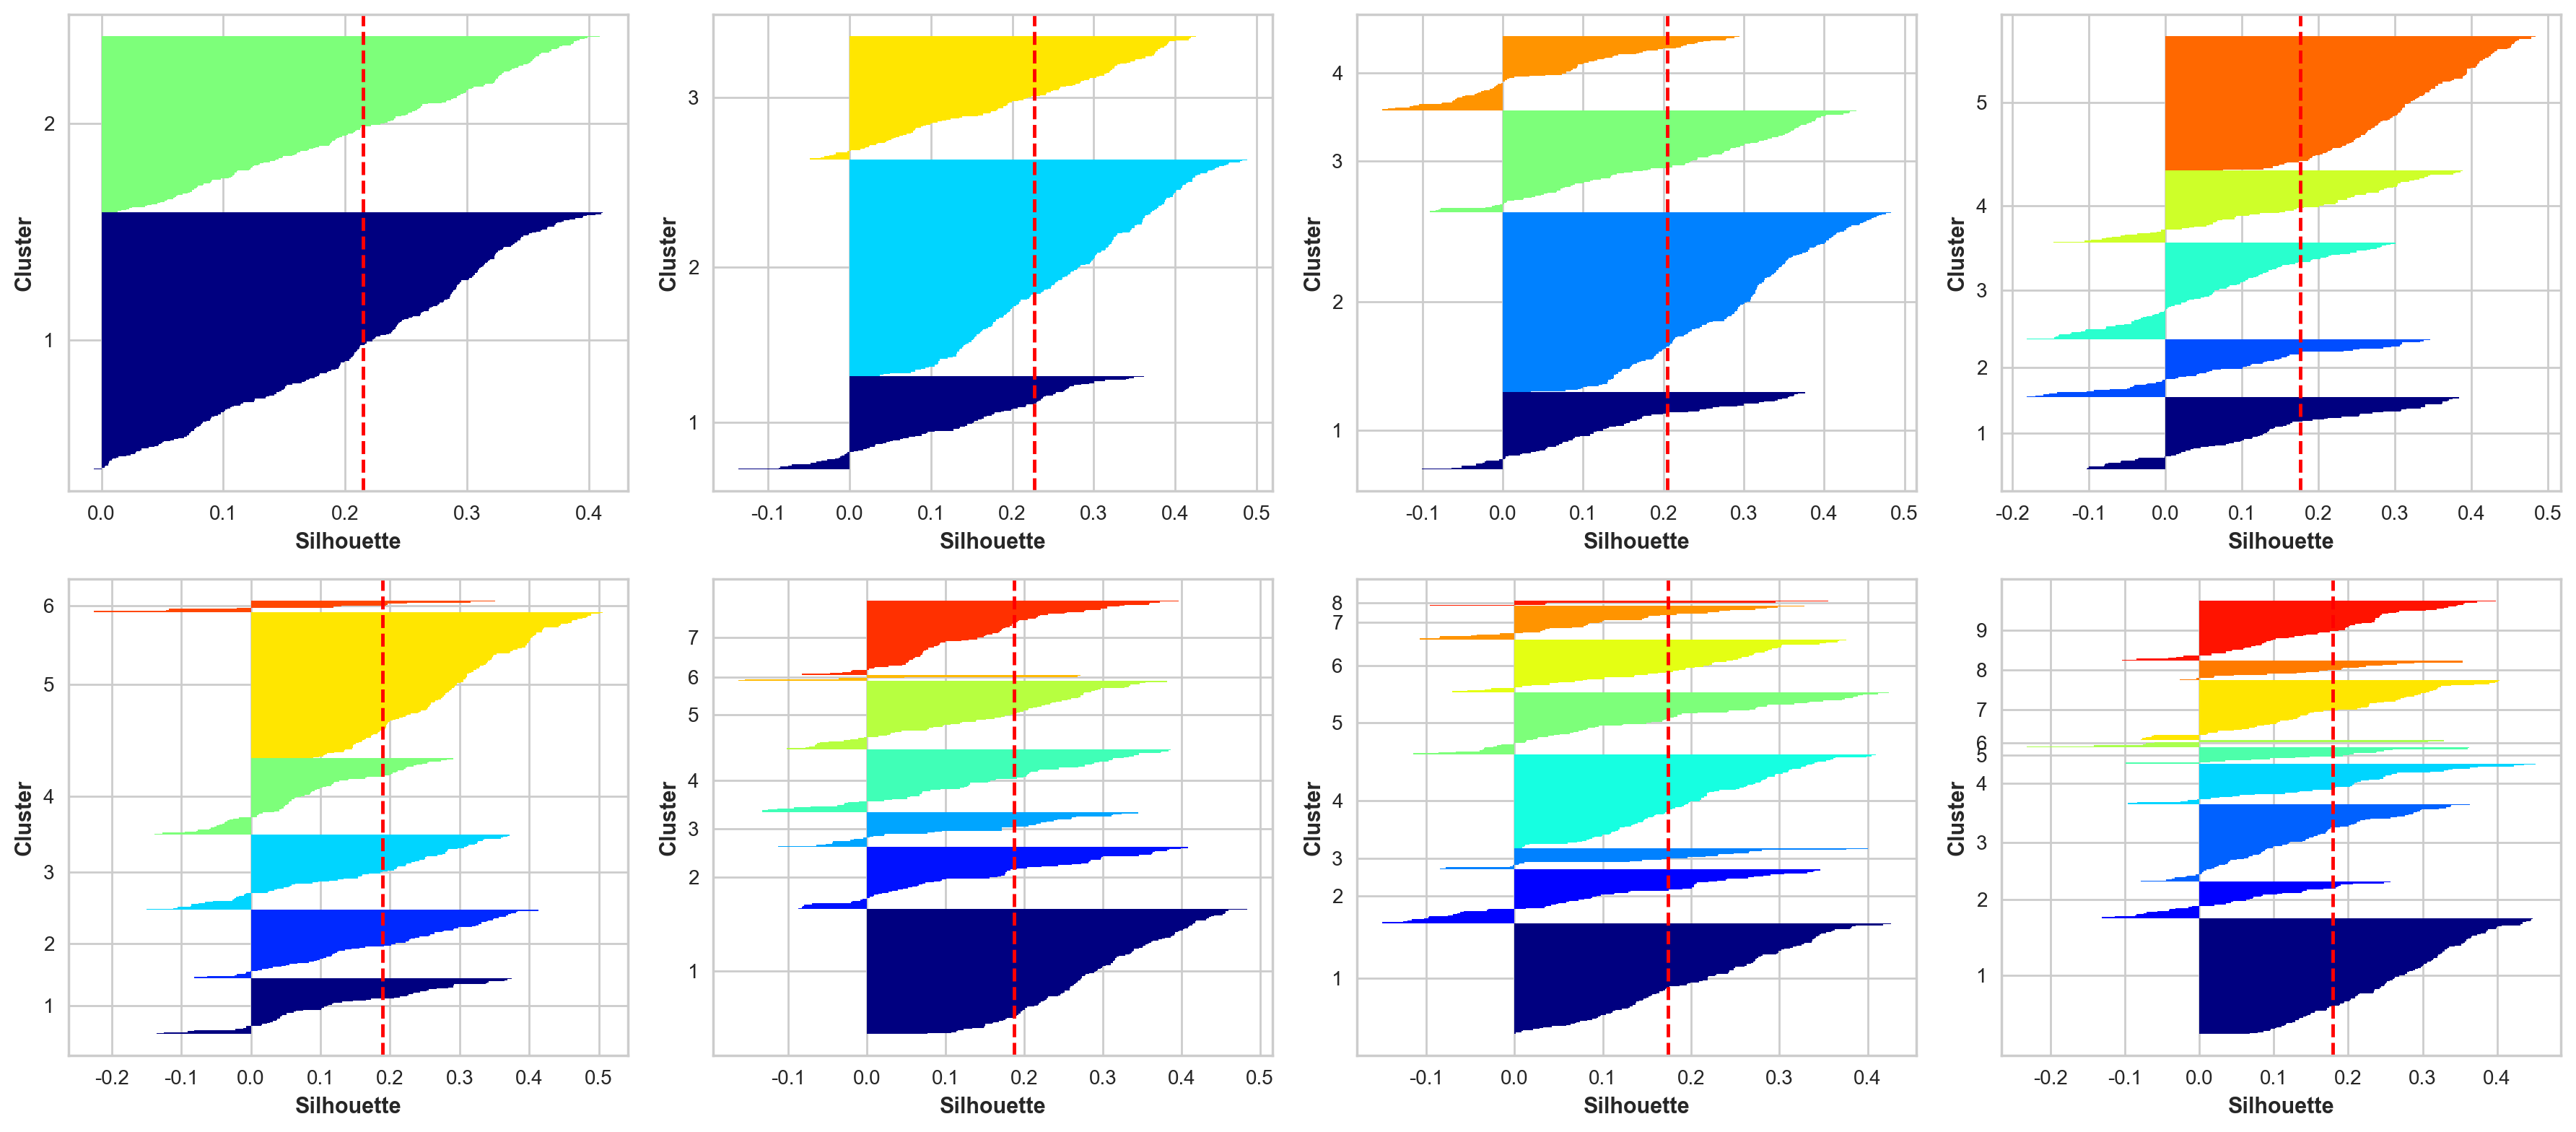

In [27]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(18,8))
for i, n_cluster in enumerate(n_clusters):
    kmeans= KMeans(n_clusters=n_cluster,
                   n_init=10,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_result)

    
    plt.subplot(nrows, ncols, i+1)
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_result, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    
plt.show()

In [28]:
pca_result.head(2)

0         1         2         3         4         5
행정동명                                                            
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


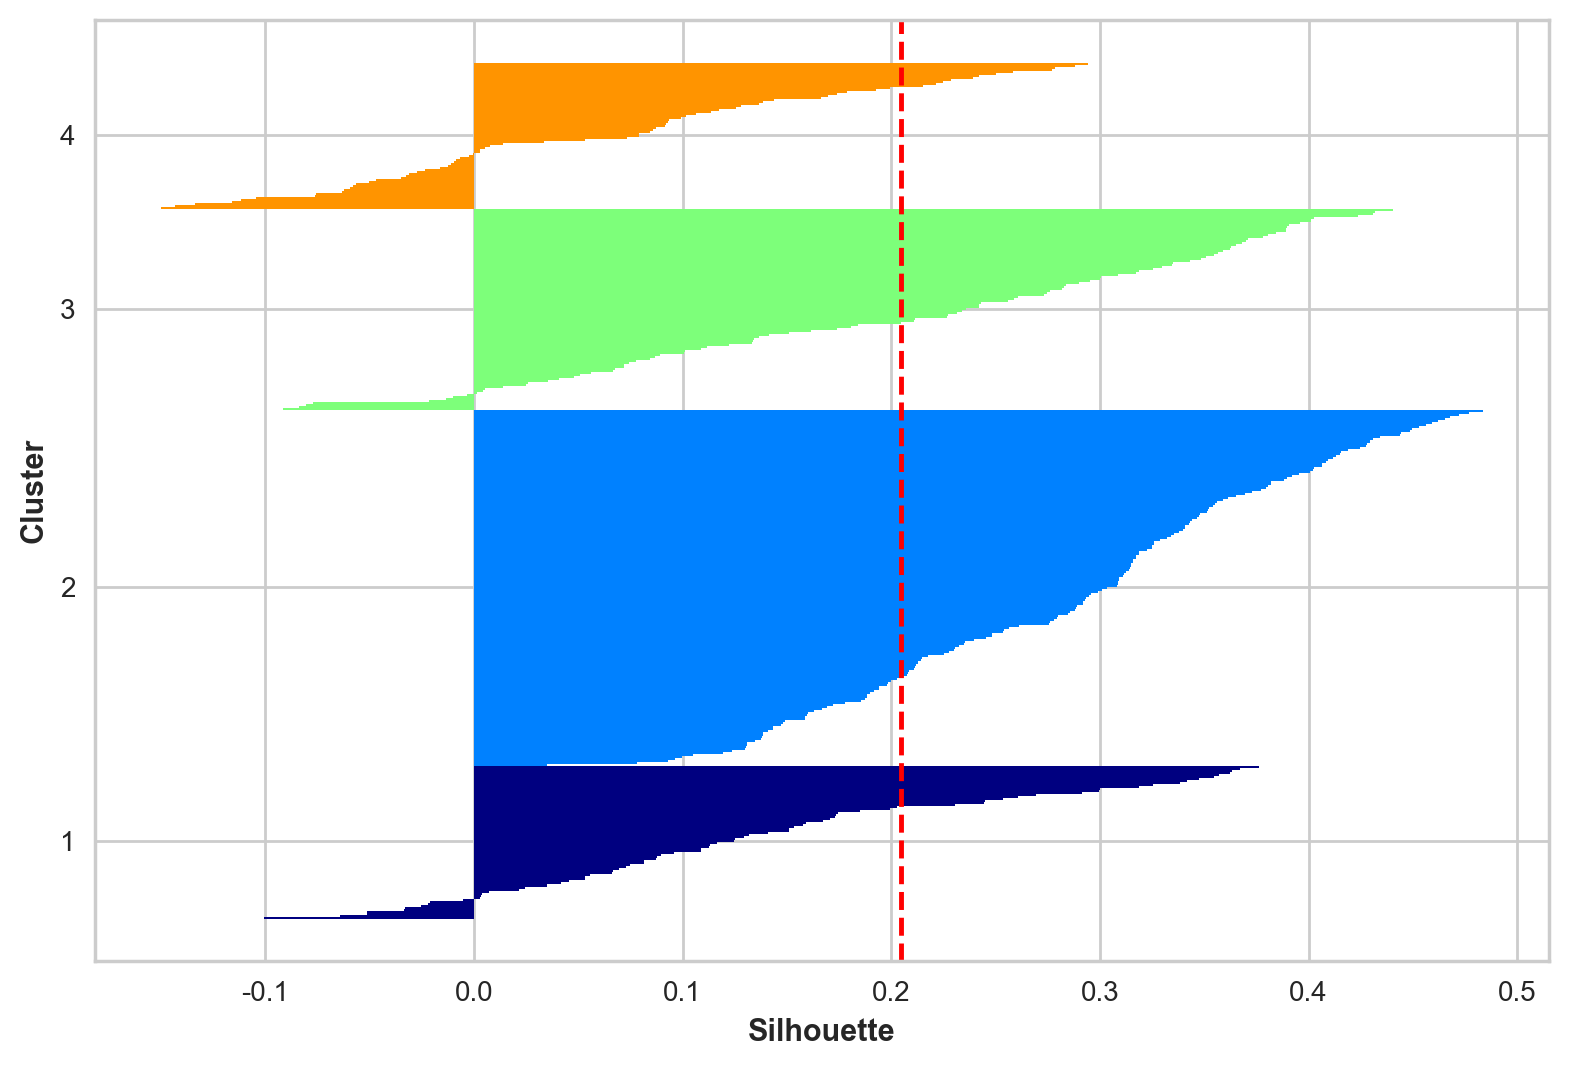

In [29]:
kmeans = KMeans(n_clusters=4,       # 클러스터 개수 4개
                init='k-means++',   # K-means 알고리즘 설정
                max_iter=300,       # 최대 몇번 반복 
                random_state=0)

y_km = kmeans.fit_predict(pca_result)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#실루엣 분석
silhouette_vals = silhouette_samples(pca_result, y_km, metric = 'euclidean')

#시각화
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
             edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#라벨링
pca_result['cluster'] = kmeans.labels_
#실루엣계수 평균값
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette')

plt.tight_layout()
plt.show()

In [30]:
pca_result.head(3)

0         1         2         3         4         5  cluster
행정동명                                                                     
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174        0
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808        2
가락본동  0.156997  0.112429  0.042758  0.028743 -0.027314  0.151885        2

In [31]:
for i in range(4):
    print(f"cluster_{i}의 개수: {len(pca_result[pca_result['cluster'] == i].index)}개")

cluster_0의 개수: 76개
cluster_1의 개수: 177개
cluster_2의 개수: 100개
cluster_3의 개수: 73개


In [32]:
pca_result

0         1         2         3         4         5  cluster
행정동명                                                                     
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174        0
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808        2
가락본동  0.156997  0.112429  0.042758  0.028743 -0.027314  0.151885        2
가리봉동 -0.612605  0.107408 -0.156476  0.051506 -0.025351 -0.021620        3
가산동  -0.117360  0.795470  0.181084 -0.224243  0.009892 -0.060995        3
...        ...       ...       ...       ...       ...       ...      ...
효창동  -0.220963 -0.147393 -0.076008 -0.179221  0.013815  0.064513        1
후암동  -0.173475 -0.012163 -0.079110 -0.033911 -0.037622 -0.009051        1
휘경1동 -0.266365  0.178560 -0.087341 -0.182468 -0.011273 -0.015696        3
휘경2동  0.044370  0.123468 -0.078969 -0.030306 -0.139292 -0.033905        1
흑석동   0.274764  0.047456  0.045378  0.099913 -0.081756 -0.093310        2

[426 rows x 7 columns]

<Axes: xlabel='V_0', ylabel='V_1'>

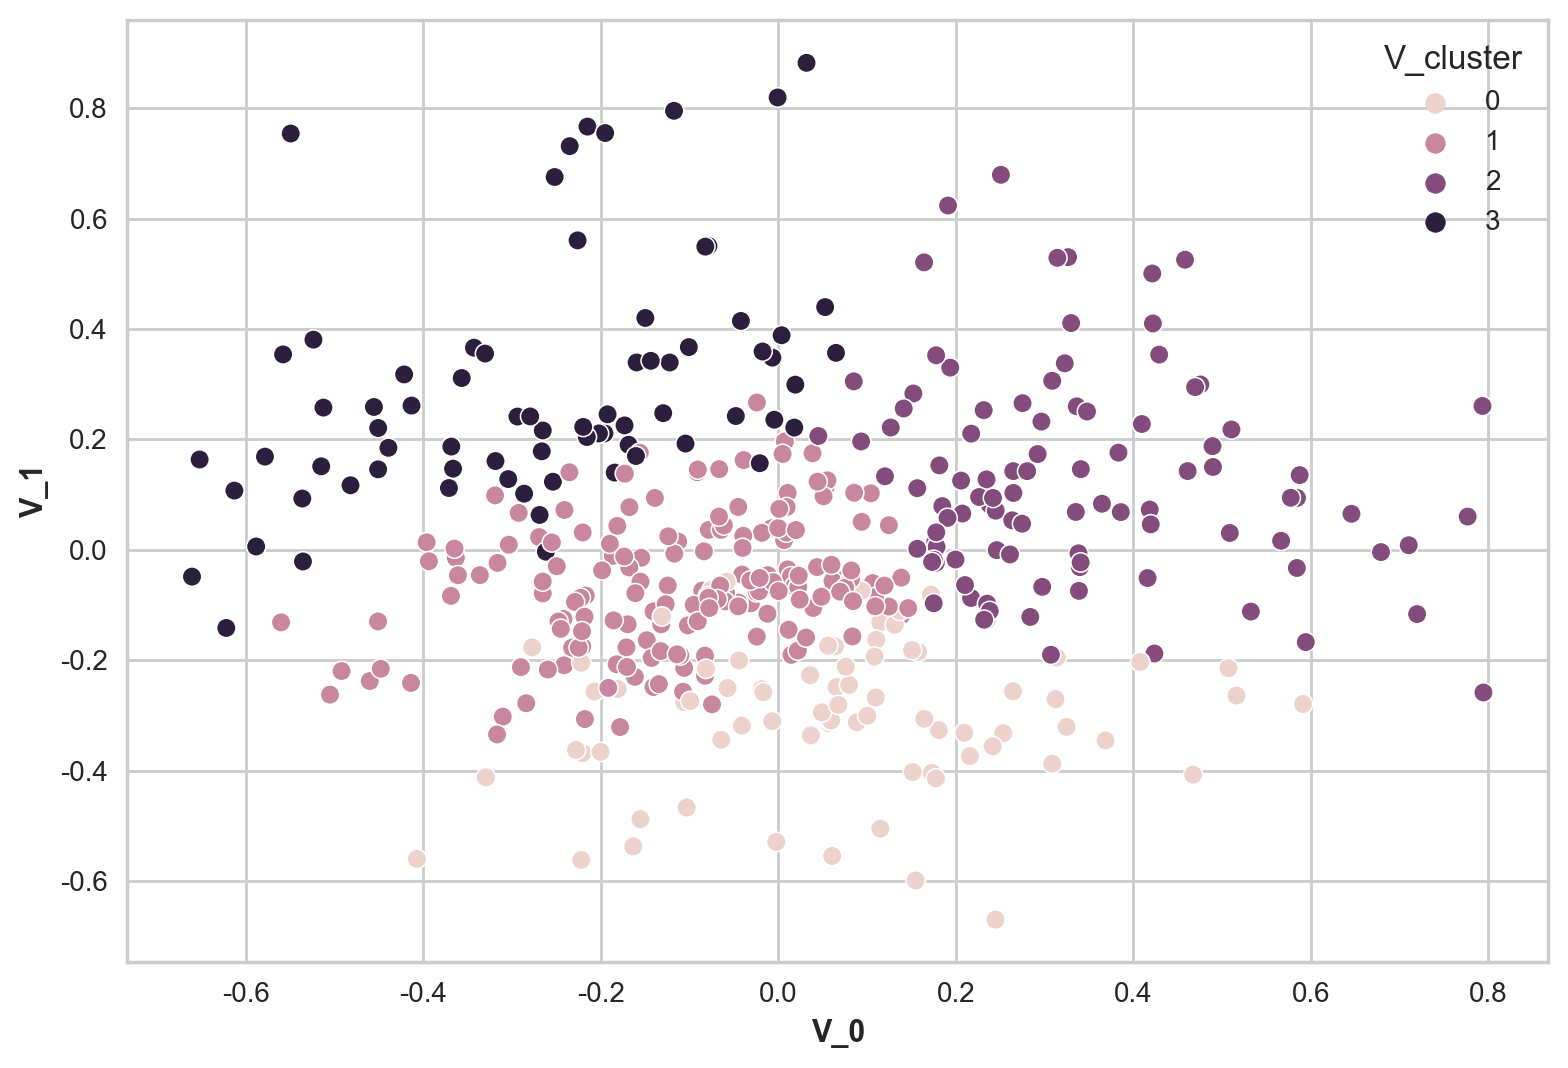

In [33]:
pca_result_T = pca_result.reset_index().copy()

pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]

sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_2'>

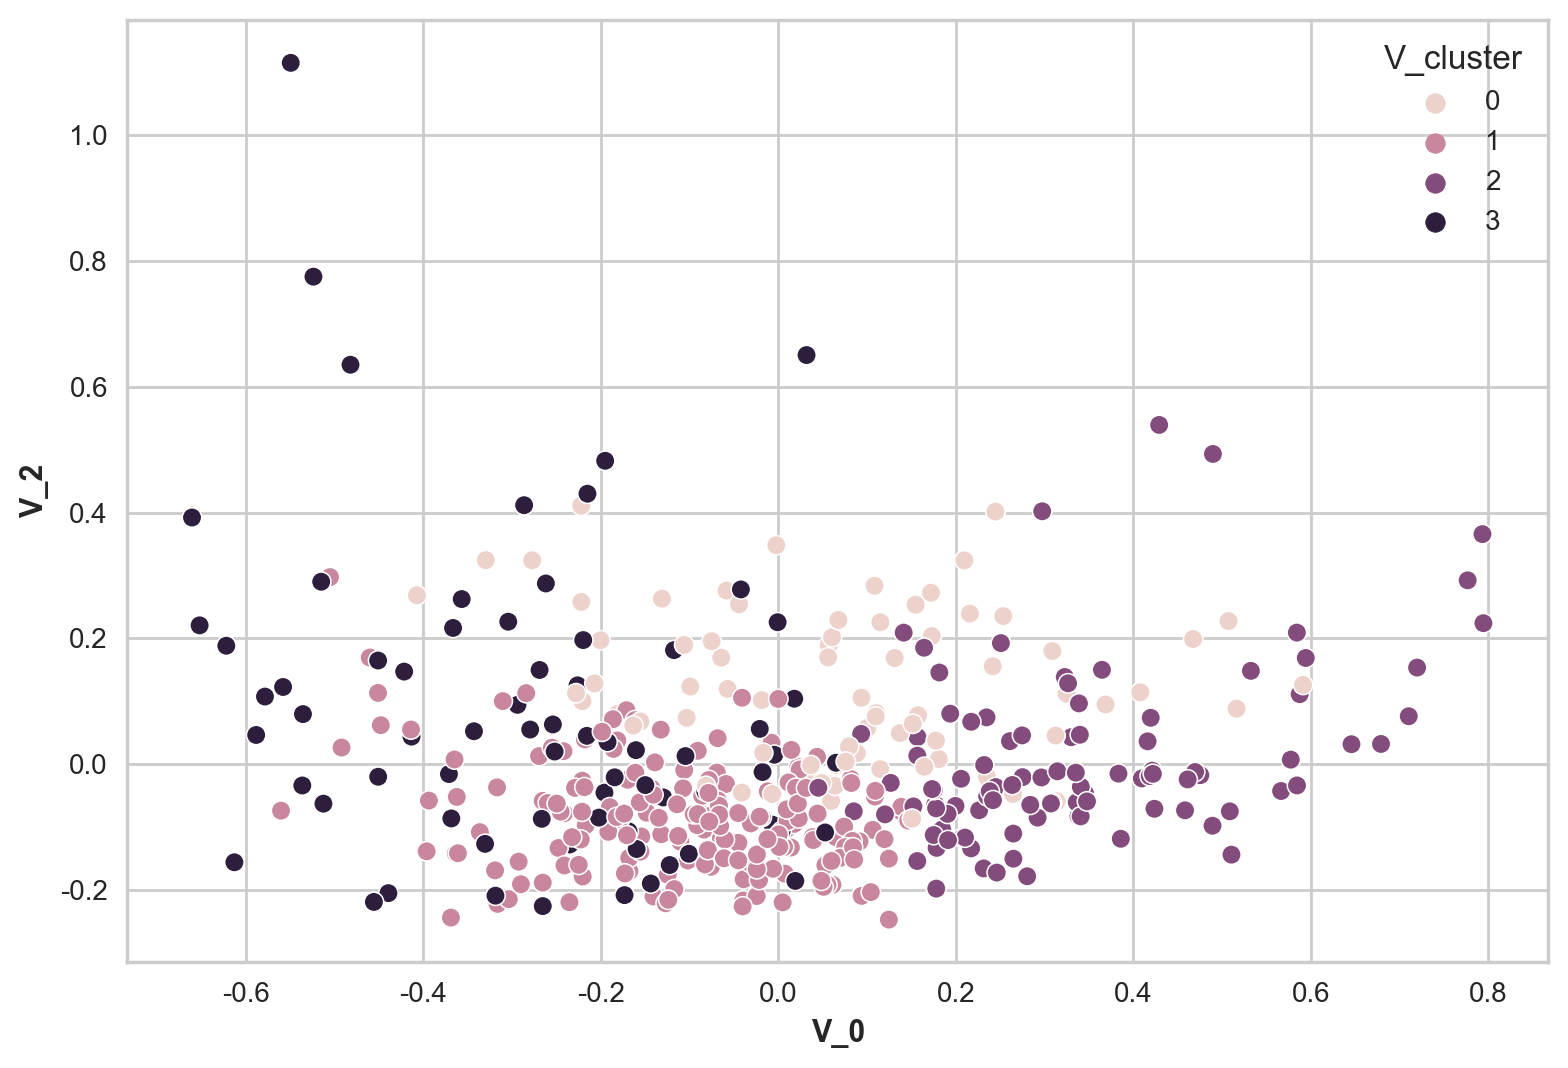

In [34]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_2', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_3'>

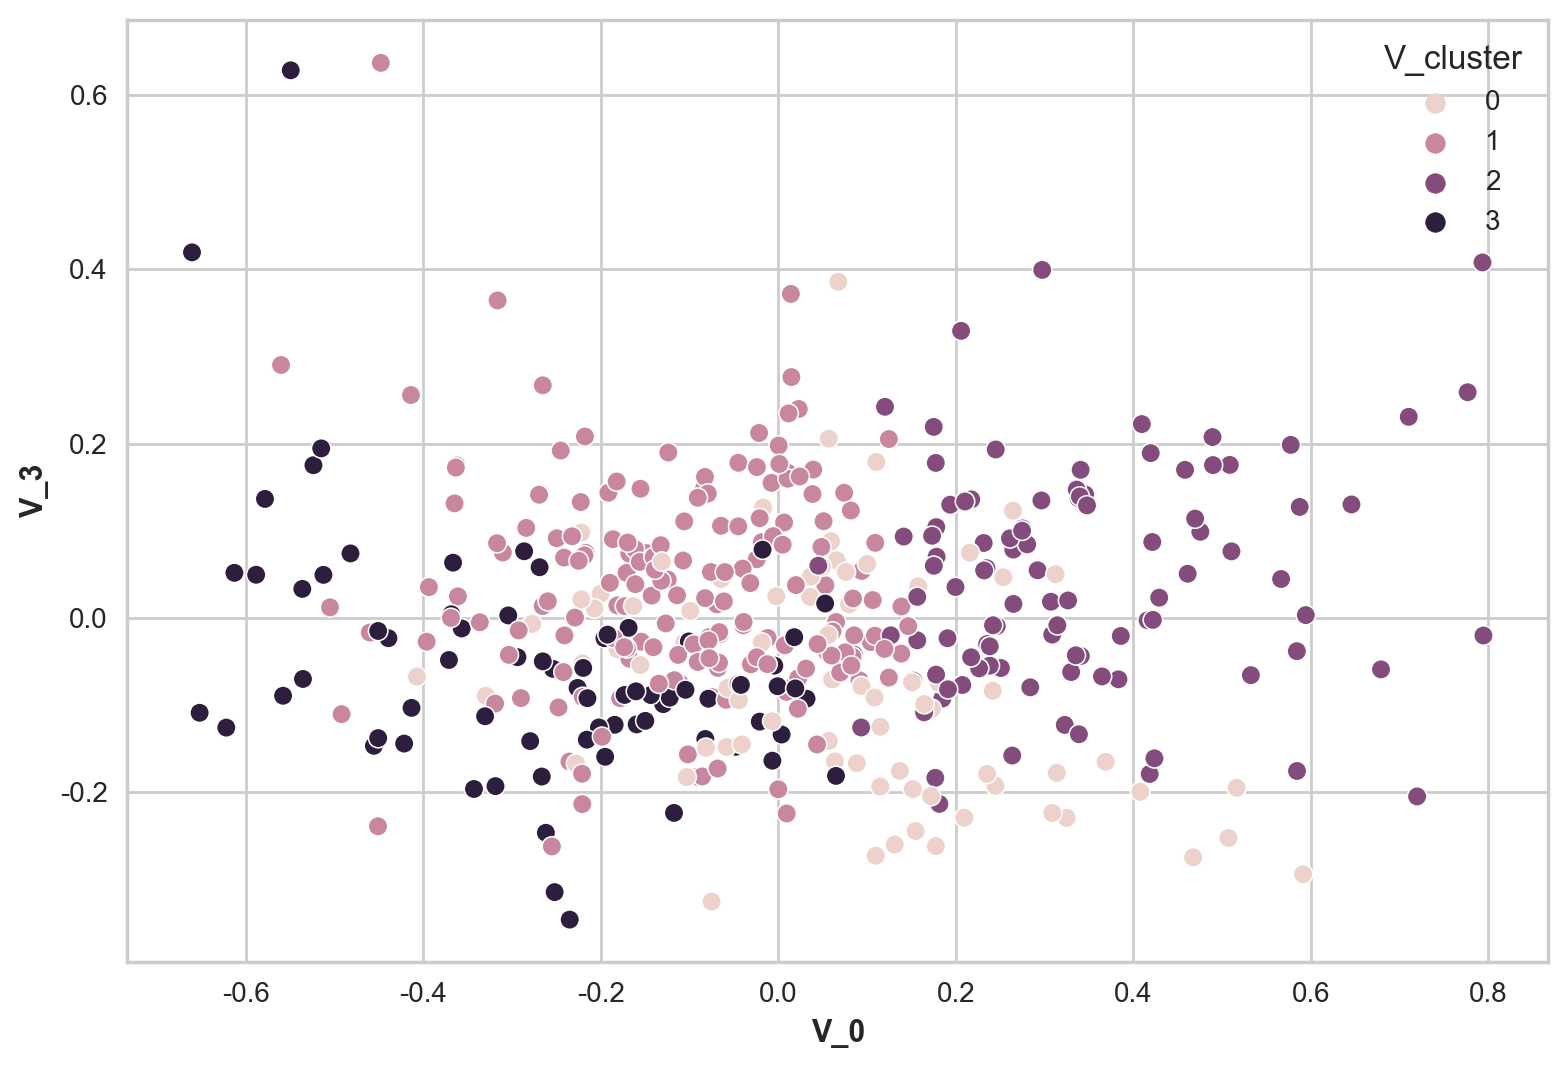

In [35]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_3', hue = 'V_cluster')

<Axes: xlabel='V_1', ylabel='V_2'>

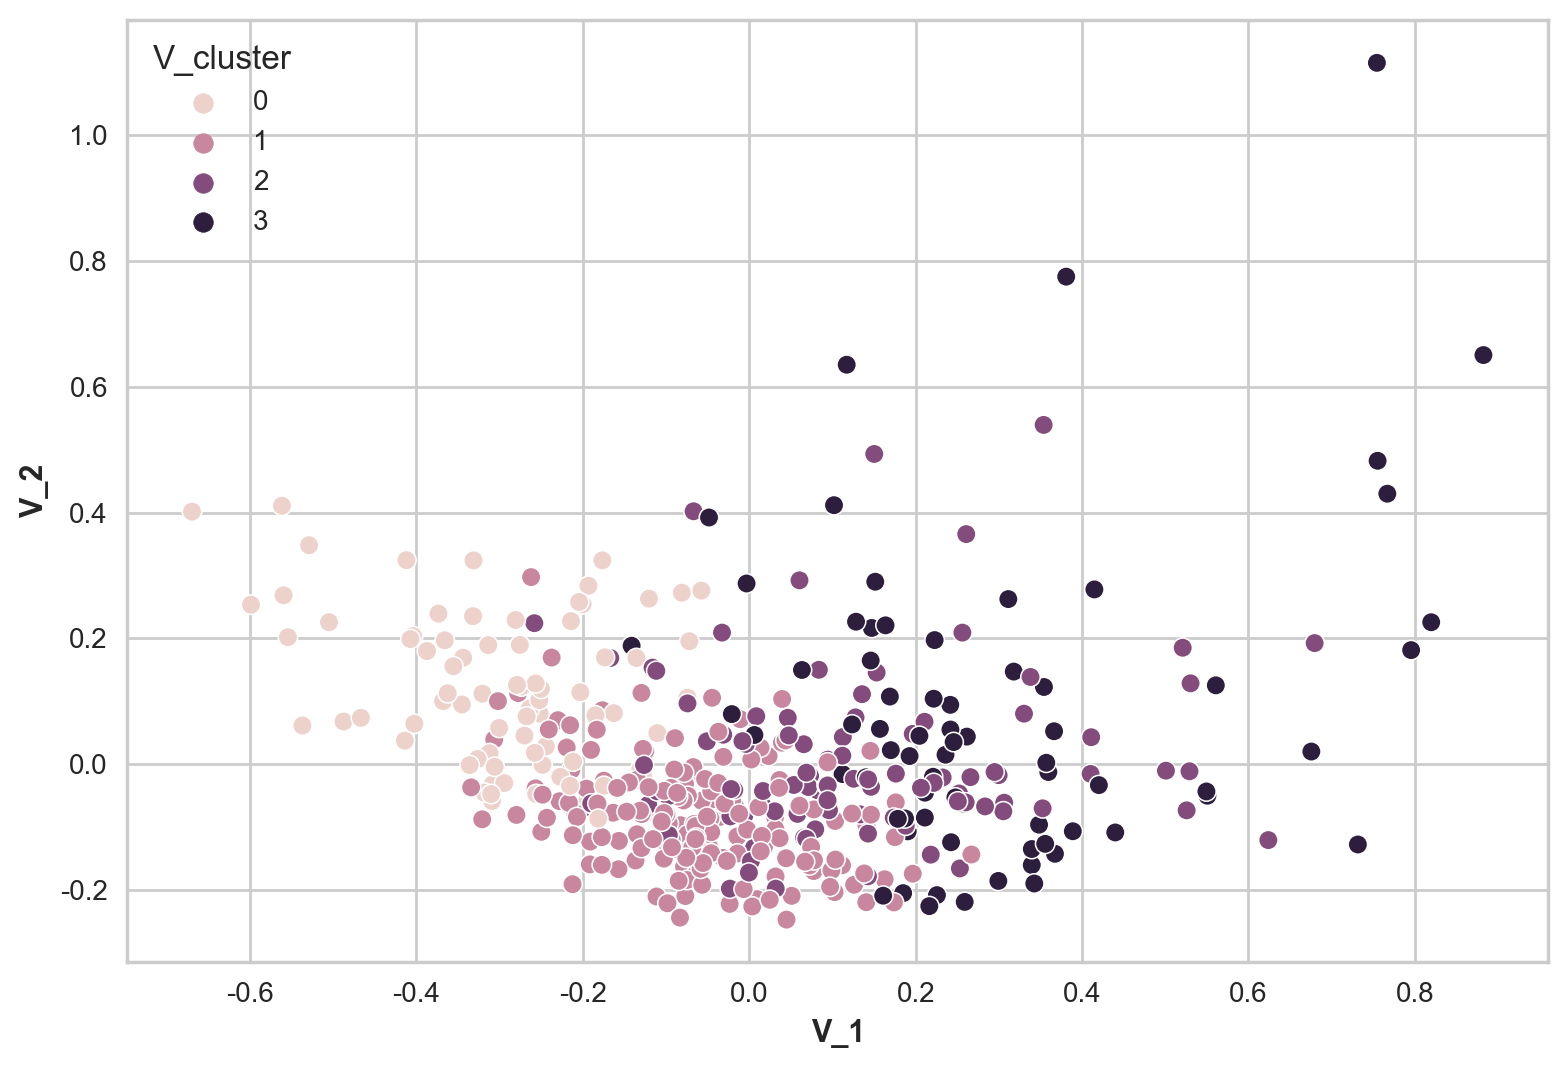

In [36]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_1', y = 'V_2', hue = 'V_cluster')

## 클러스터링 결과 해석

In [37]:
# 피처별 순위 계산
def rank(data):
    for col in data.columns:
        data[col] = data[col].rank(ascending=False).astype('int')
    return data

In [38]:
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
cluster_0

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                 
가락1동    16.560    2          0.0      26.850496   10.0         0.0   
강일동     32.123    8          2.0      25.810345    3.0         0.0   
개포1동    16.560    0          0.0     763.498160    4.0         0.0   
개포2동    33.120   12          0.0      44.448854    2.0         0.0   
개포3동    49.679    4          0.0     996.190369    0.0         0.0   
...        ...  ...          ...            ...    ...         ...   
청담동     12.345    5          0.0      76.917009    2.0         0.0   
청운효자동  118.479    2          0.0     209.289298    2.0         1.0   
하계2동    15.673    3          0.0      84.547088    0.0         0.0   
항동      17.357    2          0.0     259.425469    3.0         0.0   
행당2동    14.146    4          0.0      90.084407    2.0         0.0   

       승하차인원_버스_지하철   카페수  유치원_초등학교    인구수     총_10대  총_20_30대   총_60대이상  \
행정동명                                                                       
가락1동       184724.0  43.0  0.000054  55068  0.095664  0.272572  0.211411   
강일동        262007.0  20.0  0.000213  32811  0.110146  0.230715  0.261010   
개포1동       103771.0   1.0  0.000217   9200  0.076630  0.148043  0.245326   
개포2동       298994.0  26.0  0.000155  38769  0.125951  0.247105  0.192628   
개포3동        69514.0  15.0  0.000176  17069  0.097370  0.239557  0.283731   
...             ...   ...       ...    ...       ...       ...       ...   
청담동        574318.0  79.0  0.000200  25026  0.090186  0.282067  0.219731   
청운효자동      234604.0  70.0  0.000174  23022  0.097211  0.257840  0.256624   
하계2동       184885.0   7.0  0.000094  42734  0.118781  0.237516  0.243085   
항동          85024.0  25.0  0.000122  16415  0.087481  0.278648  0.199452   
행당2동       175068.0  11.0  0.000065  45972  0.082877  0.264813  0.252371   

           1인세대  
행정동명             
가락1동   0.166023  
강일동    0.274074  
개포1동   0.262796  
개포2동   0.170955  
개포3동   0.344273  
...         ...  
청담동    0.398477  
청운효자동  0.387715  
하계2동   0.239014  
항동     0.267579  
행당2동   0.268187  

[76 rows x 14 columns]

In [39]:
data.loc[pca_result[pca_result['cluster'] == 0].index, :].to_csv('./data/cluster_0.csv')
data.loc[pca_result[pca_result['cluster'] == 1].index, :].to_csv('./data/cluster_1.csv')
data.loc[pca_result[pca_result['cluster'] == 2].index, :].to_csv('./data/cluster_2.csv')
data.loc[pca_result[pca_result['cluster'] == 3].index, :].to_csv('./data/cluster_3.csv')

In [40]:
# 클러스터 0 순위
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_cluster_0 = cluster_0.copy()
ranked_cluster_0 = ranked_cluster_0.rank(ascending=False)
ranked_cluster_0['sum'] = ranked_cluster_0.sum(axis=1).astype('int')
ranked_cluster_0['ranking'] = ranked_cluster_0['sum'].rank(ascending=True)
ranked_cluster_0.sort_values('ranking').head(5)

미세먼지지수   공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                 
오류2동      6.0   6.0         44.5           61.0    4.5        13.0   
청운효자동     1.0  54.5         44.5           16.0   31.0        13.0   
방배4동     25.0  54.5         44.5           27.0    8.0        13.0   
강일동       9.0  11.5          4.5           58.0   17.0        49.0   
명일1동     19.0  11.5         44.5           33.0    2.5        13.0   

       승하차인원_버스_지하철   카페수  유치원_초등학교   인구수  총_10대  총_20_30대  총_60대이상  1인세대  \
행정동명                                                                        
오류2동           25.0  27.5       2.0  29.0   39.0      35.0      7.0  18.0   
청운효자동          29.0  12.0      12.0  62.0   53.0      23.0     17.0   5.0   
방배4동           17.0  15.0      61.0  15.0   31.0      20.0     42.0   9.0   
강일동            22.0  51.0       5.0  46.0   34.0      42.0     16.0  29.0   
명일1동           31.0  17.0      51.0  56.0   60.0      21.0     22.0  39.0   

       sum  ranking  
행정동명                 
오류2동   317      1.0  
청운효자동  373      2.0  
방배4동   382      3.0  
강일동    394      4.0  
명일1동   420      5.0

In [41]:
# 클러스터 1 순위
cluster_1 = data.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_cluster_1 = cluster_1.copy()
ranked_cluster_1 = ranked_cluster_1.rank(ascending=False)
ranked_cluster_1['sum'] = ranked_cluster_1.sum(axis=1).astype('int')
ranked_cluster_1['ranking'] = ranked_cluster_1['sum'].rank(ascending=True)
ranked_cluster_1.sort_values('ranking').head(5)

미세먼지지수    공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                 
길동      45.0   32.5         95.5           15.0    5.0       104.5   
구로2동    66.0   81.0          4.5           45.0   15.0         7.0   
자양1동   104.0  147.5          1.0           82.0   11.5         7.0   
보라매동    53.5   55.0         95.5           92.0   24.0        21.0   
성북동      8.0  147.5         95.5          120.0   50.5        21.0   

      승하차인원_버스_지하철   카페수  유치원_초등학교    인구수  총_10대  총_20_30대  총_60대이상  1인세대  \
행정동명                                                                        
길동            27.0   9.0      17.0   32.0  120.0      51.0    100.0  71.0   
구로2동           1.0  54.0      86.0  151.0  144.0     141.0     22.0  29.0   
자양1동          77.0  51.0      82.0   36.0   88.0       6.0    156.0  17.0   
보라매동          44.0  56.0     148.0   12.0  139.0       4.0    120.0  18.0   
성북동           16.0   7.0      41.0  104.0   69.0      34.0    134.0  40.0   

      sum  ranking  
행정동명                
길동    724      1.0  
구로2동  846      2.0  
자양1동  866      3.0  
보라매동  882      4.0  
성북동   887      5.0

In [42]:
# 클러스터 2 순위
cluster_2 = data.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_cluster_2 = cluster_2.copy()
ranked_cluster_2 = ranked_cluster_2.rank(ascending=False)
ranked_cluster_2['sum'] = ranked_cluster_2.sum(axis=1).astype('int')
ranked_cluster_2['ranking'] = ranked_cluster_2['sum'].rank(ascending=True)
ranked_cluster_2.sort_values('ranking').head(5)

미세먼지지수   공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                
진관동     25.0   5.0         59.5           65.0   48.0        16.5   
성산2동    24.0  15.5         16.5           50.0    5.0        16.5   
화곡1동    57.5  10.5         59.5           16.0   69.0         7.0   
공릉1동    43.0  34.0         59.5           18.0   16.0        16.5   
상암동     51.5   4.0          4.5            8.0   86.5         4.5   

      승하차인원_버스_지하철   카페수  유치원_초등학교   인구수  총_10대  총_20_30대  총_60대이상  1인세대  sum  \
행정동명                                                                            
진관동           10.0  10.5       2.5   7.0    1.0      26.0      9.0  86.0  371   
성산2동          50.0  52.0      43.0  14.0   48.0      18.0     70.0  24.0  446   
화곡1동          15.0  25.5      67.5   7.0   93.0       2.0      7.0  10.0  446   
공릉1동          72.0  23.5      16.0  25.0   64.0      24.0     32.0  18.0  461   
상암동            7.0   5.0      14.0  56.0    9.0      76.0     88.0  60.0  474   

      ranking  
행정동명           
진관동       1.0  
성산2동      2.5  
화곡1동      2.5  
공릉1동      4.0  
상암동       5.0

In [43]:
# 클러스터 3 순위
cluster_3 = data.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_cluster_3 = cluster_3.copy()
ranked_cluster_3 = ranked_cluster_3.rank(ascending=False)
ranked_cluster_3['sum'] = ranked_cluster_3.sum(axis=1).astype('int')
ranked_cluster_3['ranking'] = ranked_cluster_3['sum'].rank(ascending=True)
ranked_cluster_3.sort_values('ranking').head(5)

미세먼지지수   공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
종로1.2.3.4가동     1.0   9.0          1.0           41.0    6.0         4.5   
신촌동            20.0  23.0         41.0           35.0   21.5        14.5   
사직동             4.5   9.0         41.0           16.0   43.0        14.5   
영등포동            3.0  23.0         41.0           46.0   21.5        53.5   
동선동            11.0  69.0         41.0           26.0   43.0        14.5   

             승하차인원_버스_지하철   카페수  유치원_초등학교   인구수  총_10대  총_20_30대  총_60대이상  \
행정동명                                                                        
종로1.2.3.4가동           1.0   2.0       3.0  62.0   65.0      66.0      2.0   
신촌동                   4.0   6.0      11.0  23.0   33.0       3.0     69.0   
사직동                  12.0   9.0      18.0  58.0    4.0      67.0     11.0   
영등포동                  5.0  13.0      41.0   1.0   68.0       6.0     64.0   
동선동                  20.0  21.0       8.0  41.0   10.0      16.0     51.0   

             1인세대  sum  ranking  
행정동명                             
종로1.2.3.4가동   3.0  266      1.0  
신촌동           4.0  308      2.0  
사직동          72.0  379      3.0  
영등포동          7.0  393      4.0  
동선동          25.0  396      5.0

In [44]:
print(ranked_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

['오류2동', '청운효자동', '방배4동', '강일동', '명일1동']
['길동', '구로2동', '자양1동', '보라매동', '성북동']
['진관동', '성산2동', '화곡1동', '공릉1동', '상암동']
['종로1.2.3.4가동', '신촌동', '사직동', '영등포동', '동선동']


In [45]:
areas = ranked_cluster_0.sort_values('ranking').head(5).index.to_list()
areas.extend(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

In [46]:
result_df = data.copy()
result_df = result_df.loc[areas]
result_df

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
오류2동          34.714    9          0.0      13.821674    5.0         1.0   
청운효자동        118.479    2          0.0     209.289298    2.0         1.0   
방배4동          17.205    2          0.0     125.601944    4.0         1.0   
강일동           32.123    8          2.0      25.810345    3.0         0.0   
명일1동          17.327    8          0.0      92.597915    6.0         1.0   
길동            17.327    5          0.0     150.963203   15.0         0.0   
구로2동          15.774    3          2.0      68.336947    8.0         2.0   
자양1동          14.731    1          3.0      33.109862    9.0         2.0   
보라매동          17.205    4          0.0      29.769689    6.0         1.0   
성북동           54.850    1          0.0      18.458111    4.0         1.0   
진관동           18.541   16          0.0      27.848659    3.0         2.0   
성산2동          27.689   11          1.0      35.942243   11.0         2.0   
화곡1동          14.838   13          0.0      84.231195    2.0         3.0   
공릉1동          15.673    8          0.0      80.254290    7.0         2.0   
상암동           15.340   18          3.0     121.641730    1.0         4.0   
종로1.2.3.4가동  343.590    6         11.0      71.699557    8.0         5.0   
신촌동           63.233    4          0.0      92.621299    5.0         2.0   
사직동          142.175    6          0.0     171.997150    2.0         2.0   
영등포동         150.959    4          0.0      58.893061    5.0         0.0   
동선동          112.874    0          0.0     124.757538    2.0         2.0   

             승하차인원_버스_지하철    카페수  유치원_초등학교    인구수     총_10대  총_20_30대  \
행정동명                                                                    
오류2동             247964.0   42.0  0.000318  37708  0.105415  0.236395   
청운효자동            234604.0   70.0  0.000174  23022  0.097211  0.257840   
방배4동             302736.0   59.0  0.000066  45738  0.115440  0.260921   
강일동              262007.0   20.0  0.000213  32811  0.110146  0.230715   
명일1동             229806.0   56.0  0.000079  25458  0.093055  0.259211   
길동               288559.0   69.0  0.000179  44808  0.059141  0.304722   
구로2동             610995.0   39.0  0.000088  22803  0.053546  0.249485   
자양1동             220281.0   40.0  0.000090  44210  0.064148  0.353223   
보라매동             248416.0   38.0  0.000041  48286  0.055171  0.364288   
성북동              357194.0   71.0  0.000125  32124  0.067488  0.318453   
진관동              703798.0  114.0  0.000173  80894  0.177096  0.318145   
성산2동             370508.0   55.0  0.000090  77894  0.078799  0.342671   
화곡1동             614122.0   80.0  0.000062  80894  0.055134  0.492941   
공릉1동             296420.0   81.0  0.000124  72480  0.069233  0.320088   
상암동              837102.0  151.0  0.000134  59922  0.127633  0.260071   
종로1.2.3.4가동     1910857.0  324.0  0.000224  13400  0.030448  0.285821   
신촌동             1173952.0  223.0  0.000147  40694  0.046149  0.598663   
사직동              783977.0  146.0  0.000110  18178  0.073055  0.275498   
영등포동            1132620.0  131.0  0.000066  60792  0.027767  0.540170   
동선동              511138.0  113.0  0.000200  30036  0.061859  0.465974   

              총_60대이상      1인세대  
행정동명                             
오류2동         0.291185  0.322479  
청운효자동        0.256624  0.387715  
방배4동         0.221391  0.356643  
강일동          0.261010  0.274074  
명일1동         0.248881  0.259968  
길동           0.284525  0.464401  
구로2동         0.338903  0.521122  
자양1동         0.248089  0.552406  
보라매동         0.272211  0.548728  
성북동          0.265534  0.504916  
진관동          0.314411  0.306428  
성산2동         0.229029  0.489176  
화곡1동         0.317082  0.542225  
공릉1동         0.278146  0.511409  
상암동          0.205434  0.373043  
종로1.2.3.4가동  0.366716  0.801009  
신촌동          0.144395  0.799559  
사직동          0.278248  0.504722  
영등포동         0.167752  0.769605  
동선동          0.19929

In [47]:
result_df.to_csv('./data/result_1023.csv')

클러스터별 통계량 비교하기

In [48]:
cluster_0.describe()

미세먼지지수        공원수  도시농업(프로그램수)  거주_유동_인구당_매출액      채소가게수  \
count   76.000000  76.000000    76.000000      76.000000  76.000000   
mean    20.972684   4.092105     0.263158     127.965954   1.921053   
std     18.214390   3.103450     0.660675     163.769524   1.726369   
min     11.848000   0.000000     0.000000       1.287593   0.000000   
25%     14.719000   2.000000     0.000000      26.590458   1.000000   
50%     15.659500   3.000000     0.000000      80.586452   1.500000   
75%     17.327000   6.000000     0.000000     171.407474   3.000000   
max    118.479000  14.000000     3.000000     996.190369  10.000000   

       제로웨이스트 가게수   승하차인원_버스_지하철         카페수   유치원_초등학교           인구수  \
count   76.000000      76.000000   76.000000  76.000000     76.000000   
mean     0.328947  247284.092105   39.710526   0.000119  34983.263158   
std      0.574762  157407.947081   31.893496   0.000062  12708.209002   
min      0.000000   60335.000000    1.000000   0.000000   9200.000000   
25%      0.000000  158267.750000   15.000000   0.000071  25072.500000   
50%      0.000000  194286.000000   31.500000   0.000118  35652.500000   
75%      1.000000  278133.750000   52.000000   0.000159  42474.000000   
max      2.000000  680504.000000  152.000000   0.000349  69860.000000   

           총_10대   총_20_30대    총_60대이상       1인세대  
count  76.000000  76.000000  76.000000  76.000000  
mean    0.115728   0.234621   0.229287   0.256747  
std     0.031382   0.036206   0.039877   0.077811  
min     0.049759   0.129380   0.130440   0.078523  
25%     0.094333   0.212335   0.203294   0.199050  
50%     0.106333   0.234216   0.224660   0.261382  
75%     0.136127   0.261575   0.254483   0.312246  
max     0.223722   0.322368   0.321303   0.429042

In [49]:
cluster_1.describe()

미세먼지지수         공원수  도시농업(프로그램수)  거주_유동_인구당_매출액       채소가게수  \
count  177.000000  177.000000   177.000000     177.000000  177.000000   
mean    19.699113    3.062147     0.118644      59.416775    3.604520   
std     14.151952    2.129763     0.455450      86.532928    7.127219   
min     11.848000    0.000000     0.000000       1.415752    0.000000   
25%     14.146000    1.000000     0.000000      15.919574    1.000000   
50%     14.838000    3.000000     0.000000      30.720774    2.000000   
75%     17.327000    4.000000     0.000000      68.336947    4.000000   
max     99.025000   11.000000     3.000000     677.350068   86.000000   

       제로웨이스트 가게수   승하차인원_버스_지하철         카페수    유치원_초등학교           인구수  \
count  177.000000     177.000000  177.000000  177.000000    177.000000   
mean     0.259887  207714.299435   32.288136    0.000093  33996.446328   
std      0.674390  105861.665293   18.664244    0.000058  10492.897351   
min      0.000000   22966.000000    4.000000    0.000000   9200.000000   
25%      0.000000  135795.000000   18.000000    0.000054  26548.000000   
50%      0.000000  193005.000000   29.000000    0.000087  34952.000000   
75%      0.000000  248044.000000   42.000000    0.000118  41694.000000   
max      5.000000  610995.000000  113.000000    0.000352  56090.000000   

            총_10대    총_20_30대     총_60대이상        1인세대  
count  177.000000  177.000000  177.000000  177.000000  
mean     0.064191    0.280858    0.292038    0.439798  
std      0.013259    0.043723    0.047347    0.075038  
min      0.008478    0.010435    0.013043    0.280614  
25%      0.057269    0.253013    0.265785    0.385571  
50%      0.064097    0.278178    0.290847    0.427536  
75%      0.072642    0.311233    0.314635    0.494807  
max      0.098515    0.385587    0.459634    0.594666

In [50]:
cluster_2.describe()

미세먼지지수        공원수  도시농업(프로그램수)  거주_유동_인구당_매출액       채소가게수  \
count  100.000000  100.00000   100.000000     100.000000  100.000000   
mean    22.532050    7.31000     0.400000      47.197226    3.820000   
std     17.292819    4.38937     0.942809      40.145731    3.322346   
min     11.848000    0.00000     0.000000       0.986333    0.000000   
25%     14.108500    4.00000     0.000000      19.080562    2.000000   
50%     15.493000    6.50000     0.000000      35.888216    3.000000   
75%     17.837500    9.00000     0.000000      62.515419    5.000000   
max    100.640000   26.00000     4.000000     205.761715   18.000000   

       제로웨이스트 가게수  승하차인원_버스_지하철        카페수    유치원_초등학교           인구수  \
count   100.00000  1.000000e+02  100.00000  100.000000    100.000000   
mean      0.96000  4.264311e+05   67.25000    0.000084  63910.970000   
std       1.44194  2.252055e+05   45.96054    0.000040  10098.540192   
min       0.00000  1.547670e+05   14.00000    0.000016  42754.000000   
25%       0.00000  2.734122e+05   40.00000    0.000054  56068.000000   
50%       0.50000  3.658800e+05   56.50000    0.000079  62967.000000   
75%       1.00000  5.055880e+05   80.00000    0.000107  72330.000000   
max       8.00000  1.631757e+06  302.00000    0.000226  80894.000000   

            총_10대    총_20_30대     총_60대이상        1인세대  
count  100.000000  100.000000  100.000000  100.000000  
mean     0.083270    0.296587    0.255910    0.406062  
std      0.027149    0.060780    0.043821    0.106688  
min      0.043414    0.185230    0.144411    0.132038  
25%      0.063927    0.261516    0.225140    0.343288  
50%      0.077851    0.282644    0.260563    0.408411  
75%      0.093501    0.318375    0.286824    0.482353  
max      0.177096    0.531129    0.363388    0.733199

In [51]:
cluster_3.describe().astype('float')

미세먼지지수        공원수  도시농업(프로그램수)  거주_유동_인구당_매출액      채소가게수  \
count   73.000000  73.000000    73.000000      73.000000  73.000000   
mean    48.208932   3.000000     0.424658     111.679069   3.438356   
std     59.609708   2.291288     1.778871     108.100901   2.999937   
min     12.345000   0.000000     0.000000       5.588241   0.000000   
25%     14.731000   1.000000     0.000000      33.978083   1.000000   
50%     17.205000   2.000000     0.000000      83.295010   2.000000   
75%     68.434000   5.000000     0.000000     159.140077   5.000000   
max    343.590000  11.000000    11.000000     656.620172  12.000000   

       제로웨이스트 가게수  승하차인원_버스_지하철         카페수   유치원_초등학교           인구수  \
count   73.000000  7.300000e+01   73.000000  73.000000     73.000000   
mean     1.424658  4.675873e+05   90.986301   0.000089  31530.808219   
std      3.869101  3.593235e+05   73.730646   0.000074  14477.516045   
min      0.000000  5.239100e+04    0.000000   0.000000   9200.000000   
25%      0.000000  2.354120e+05   40.000000   0.000041  20416.000000   
50%      0.000000  3.515240e+05   72.000000   0.000082  33072.000000   
75%      2.000000  5.737810e+05  117.000000   0.000110  44992.000000   
max     31.000000  1.910857e+06  406.000000   0.000435  60792.000000   

           총_10대   총_20_30대    총_60대이상       1인세대  
count  73.000000  73.000000  73.000000  73.000000  
mean    0.046276   0.402727   0.223494   0.651561  
std     0.016589   0.104267   0.058554   0.083458  
min     0.000543   0.001957   0.001739   0.473162  
25%     0.037016   0.364871   0.196125   0.593568  
50%     0.045235   0.407006   0.224748   0.650738  
75%     0.054936   0.448831   0.253492   0.706243  
max     0.120295   0.664557   0.385435   0.857793

min_max 스케일링된 데이터로 랭킹 구하기

In [52]:
scaled_cluster_0 = scaled_df.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_scaled_cluster_0 = scaled_cluster_0.copy()
ranked_scaled_cluster_0.columns = data.columns
ranked_scaled_cluster_0['sum'] = ranked_scaled_cluster_0.sum(axis=1)
ranked_scaled_cluster_0['ranking'] = ranked_scaled_cluster_0['sum'].rank(ascending=False)
ranked_scaled_cluster_0.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                          
오류2동   0.068927  0.346154     0.000000       0.012897  0.058140    0.032258   
개포3동   0.114037  0.153846     0.000000       1.000000  0.000000    0.000000   
명일2동   0.016516  0.076923     0.000000       0.477318  0.023256    0.000000   
청운효자동  0.321427  0.076923     0.000000       0.209307  0.023256    0.032258   
강일동    0.061117  0.307692     0.181818       0.024944  0.034884    0.000000   

       승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                    
오류2동       0.119180  0.103448  0.731940  0.397634  0.469901  0.353816   
개포3동       0.024656  0.036946  0.404242  0.109758  0.433850  0.358588   
명일2동       0.048038  0.100985  0.801859  0.111725  0.616430  0.351066   
청운효자동      0.112103  0.172414  0.399618  0.192792  0.433142  0.386181   
강일동        0.126618  0.049261  0.490689  0.329330  0.491098  0.345244   

        총_60대이상      1인세대       sum  ranking  
행정동명                                          
오류2동   0.632122  0.313057  3.639475      1.0  
개포3동   0.615843  0.341025  3.592791      2.0  
명일2동   0.527522  0.245873  3.397511      3.0  
청운효자동  0.556645  0.396771  3.312836      4.0  
강일동    0.566223  0.250941  3.259860      5.0

In [53]:
scaled_cluster_1 = scaled_df.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_scaled_cluster_1 = scaled_cluster_1.copy()
ranked_scaled_cluster_1.columns = data.columns
ranked_scaled_cluster_1['sum'] = ranked_scaled_cluster_1.sum(axis=1)
ranked_scaled_cluster_1['ranking'] = ranked_scaled_cluster_1['sum'].rank(ascending=False)
ranked_scaled_cluster_1.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
제기동   0.006927  0.076923     0.000000       0.009733  1.000000    0.000000   
길동    0.016516  0.192308     0.000000       0.150700  0.174419    0.000000   
수서동   0.014204  0.153846     0.000000       0.072118  0.011628    0.000000   
자양1동  0.008690  0.038462     0.272727       0.032278  0.104651    0.064516   
방화3동  0.013393  0.346154     0.000000       0.172012  0.000000    0.032258   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
제기동       0.287772  0.130542  0.239753  0.540715  0.235025  0.474986   
길동        0.140682  0.169951  0.410641  0.496666  0.262560  0.456936   
수서동       0.198989  0.073892  0.808720  0.070020  0.154170  0.325952   
자양1동      0.104516  0.098522  0.208098  0.488325  0.284996  0.530134   
방화3동      0.019146  0.064039  0.310853  0.490892  0.277547  0.369300   

       총_60대이상      1인세대       sum  ranking  
행정동명                                         
제기동   0.716036  0.650481  4.368892      1.0  
길동    0.617578  0.495179  3.584135      2.0  
수서동   1.000000  0.539121  3.422660      3.0  
자양1동  0.538004  0.608112  3.382032      4.0  
방화3동  0.754867  0.506617  3.357079      5.0

In [54]:
scaled_cluster_2 = scaled_df.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_scaled_cluster_2 = scaled_cluster_2.copy()
ranked_scaled_cluster_2.columns = data.columns
ranked_scaled_cluster_2['sum'] = ranked_scaled_cluster_2.sum(axis=1)
ranked_scaled_cluster_2['ranking'] = ranked_scaled_cluster_2['sum'].rank(ascending=False)
ranked_scaled_cluster_2.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
진관동   0.020175  0.615385     0.000000       0.026992  0.034884    0.064516   
양재1동  0.058292  1.000000     0.000000       0.036686  0.023256    0.000000   
상암동   0.010526  0.692308     0.272727       0.121237  0.011628    0.129032   
여의동   0.014846  0.153846     0.000000       0.080705  0.046512    0.064516   
가양1동  0.056767  0.461538     0.000000       0.076893  0.023256    0.225806   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
진관동       0.360631  0.280788  0.398052  1.000000  0.791082  0.477193   
양재1동      0.488580  0.280788  0.341187  1.000000  0.489318  0.403276   
상암동       0.431241  0.371921  0.307066  0.707479  0.569451  0.389548   
여의동       0.852163  0.743842  0.246970  0.780958  0.405565  0.370934   
가양1동      0.228031  0.536946  0.134980  0.822356  0.226998  0.740069   

       총_60대이상      1인세대       sum  ranking  
행정동명                                         
진관동   0.682847  0.292459  5.045004      1.0  
양재1동  0.566165  0.352300  5.039847      2.0  
상암동   0.444850  0.377943  4.836957      3.0  
여의동   0.585880  0.307461  4.654198      4.0  
가양1동  0.349175  0.768318  4.651134      5.0

In [55]:
scaled_cluster_3 = scaled_df.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_scaled_cluster_3 = scaled_cluster_3.copy()
ranked_scaled_cluster_3.columns = data.columns
ranked_scaled_cluster_3['sum'] = ranked_scaled_cluster_3.sum(axis=1)
ranked_scaled_cluster_3['ranking'] = ranked_scaled_cluster_3['sum'].rank(ascending=False)
ranked_scaled_cluster_3.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  \
행정동명                                                                    
종로1.2.3.4가동  1.000000  0.230769          1.0       0.071054  0.093023   
명동           0.785713  0.307692          0.0       0.163768  0.034884   
서교동          0.098311  0.269231          0.0       0.078437  0.023256   
신촌동          0.154894  0.153846          0.0       0.092077  0.058140   
영등포동         0.419335  0.153846          0.0       0.058186  0.058140   

             제로웨이스트 가게수  승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  \
행정동명                                                                            
종로1.2.3.4가동    0.161290      1.000000  0.798030  0.514925  0.058582  0.133993   
명동             1.000000      0.428661  0.564039  0.250000  0.000000  0.127116   
서교동            0.000000      0.886659  1.000000  0.142227  0.548358  0.193367   
신촌동            0.064516      0.609668  0.549261  0.339116  0.439284  0.204347   
영등포동           0.000000      0.587774  0.322660  0.151336  0.719614  0.121980   

             총_20_30대   총_60대이상      1인세대       sum  ranking  
행정동명                                                          
종로1.2.3.4가동  0.428410  0.797076  0.927132  7.214284      1.0  
명동           0.226053  0.455297  0.794360  5.137583      2.0  
서교동          0.708502  0.408458  0.766423  5.123229      3.0  
신촌동          0.900553  0.311546  0.925271  4.802519      4.0  
영등포동         0.812274  0.362557  0.886833  4.654535      5.0

In [56]:
print(ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

['오류2동', '개포3동', '명일2동', '청운효자동', '강일동']
['제기동', '길동', '수서동', '자양1동', '방화3동']
['진관동', '양재1동', '상암동', '여의동', '가양1동']
['종로1.2.3.4가동', '명동', '서교동', '신촌동', '영등포동']


In [57]:
scaled_areas = ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list()
scaled_areas.extend(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

In [58]:
scaled_result_df = data.copy()
scaled_result_df = scaled_result_df.loc[scaled_areas]
scaled_result_df

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
오류2동          34.714    9          0.0      13.821674    5.0         1.0   
개포3동          49.679    4          0.0     996.190369    0.0         0.0   
명일2동          17.327    2          0.0     476.014744    2.0         0.0   
청운효자동        118.479    2          0.0     209.289298    2.0         1.0   
강일동           32.123    8          2.0      25.810345    3.0         0.0   
제기동           14.146    2          0.0      10.672501   86.0         0.0   
길동            17.327    5          0.0     150.963203   15.0         0.0   
수서동           16.560    4          0.0      72.758912    1.0         0.0   
자양1동          14.731    1          3.0      33.109862    9.0         2.0   
방화3동          16.291    9          0.0     172.173625    0.0         1.0   
진관동           18.541   16          0.0      27.848659    3.0         2.0   
양재1동          31.186   26          0.0      37.496612    2.0         0.0   
상암동           15.340   18          3.0     121.641730    1.0         4.0   
여의동           16.773    4          0.0      81.303879    4.0         2.0   
가양1동          30.680   12          0.0      77.510970    2.0         7.0   
종로1.2.3.4가동  343.590    6         11.0      71.699557    8.0         5.0   
명동           272.502    8          0.0     163.968537    3.0        31.0   
서교동           44.462    7          0.0      79.047032    2.0         0.0   
신촌동           63.233    4          0.0      92.621299    5.0         2.0   
영등포동         150.959    4          0.0      58.893061    5.0         0.0   

             승하차인원_버스_지하철    카페수  유치원_초등학교    인구수     총_10대  총_20_30대  \
행정동명                                                                    
오류2동             247964.0   42.0  0.000318  37708  0.105415  0.236395   
개포3동              69514.0   15.0  0.000176  17069  0.097370  0.239557   
명일2동             113657.0   41.0  0.000349  17210  0.138117  0.234573   
청운효자동            234604.0   70.0  0.000174  23022  0.097211  0.257840   
강일동              262007.0   20.0  0.000213  32811  0.110146  0.230715   
제기동              566249.0   53.0  0.000104  47966  0.052996  0.316683   
길동               288559.0   69.0  0.000179  44808  0.059141  0.304722   
수서동              398636.0   30.0  0.000352  14220  0.034951  0.217932   
자양1동             220281.0   40.0  0.000090  44210  0.064148  0.353223   
방화3동              59112.0   26.0  0.000135  44394  0.062486  0.246655   
진관동              703798.0  114.0  0.000173  80894  0.177096  0.318145   
양재1동             945351.0  114.0  0.000148  80894  0.109749  0.269167   
상암동              837102.0  151.0  0.000134  59922  0.127633  0.260071   
여의동             1631757.0  302.0  0.000107  65190  0.091057  0.247737   
가양1동             453464.0  218.0  0.000059  68158  0.051205  0.492327   
종로1.2.3.4가동     1910857.0  324.0  0.000224  13400  0.030448  0.285821   
명동               832232.0  229.0  0.000109   9200  0.028913  0.151739   
서교동             1696882.0  406.0  0.000062  48514  0.043699  0.471410   
신촌동             1173952.0  223.0  0.000147  40694  0.046149  0.598663   
영등포동            1132620.0  131.0  0.000066  60792  0.027767  0.540170   

              총_60대이상      1인세대  
행정동명                             
오류2동         0.291185  0.322479  
개포3동         0.283731  0.344273  
명일2동         0.243289  0.270125  
청운효자동        0.256624  0.387715  
강일동          0.261010  0.274074  
제기동          0.329608  0.585423  
길동           0.284525  0.464401  
수서동          0.459634  0.498644  
자양1동         0.248089  0.552406  
방화3동         0.347389  0.473314  
진관동          0.314411  0.306428  
양재1동         0.260984  0.353060  
상암동          0.205434  0.373043  
여의동          0.270011  0.318118  
가양1동         0.161624  0.677250  
종로1.2.3.4가동  0.366716  0.801009  
명동           0.210217  0.697544  
서교동          0.188770  0.675773  
신촌동          0.144395  0.799559  
영등포동         0.16775

클러스터링 이후, scaled data

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_f

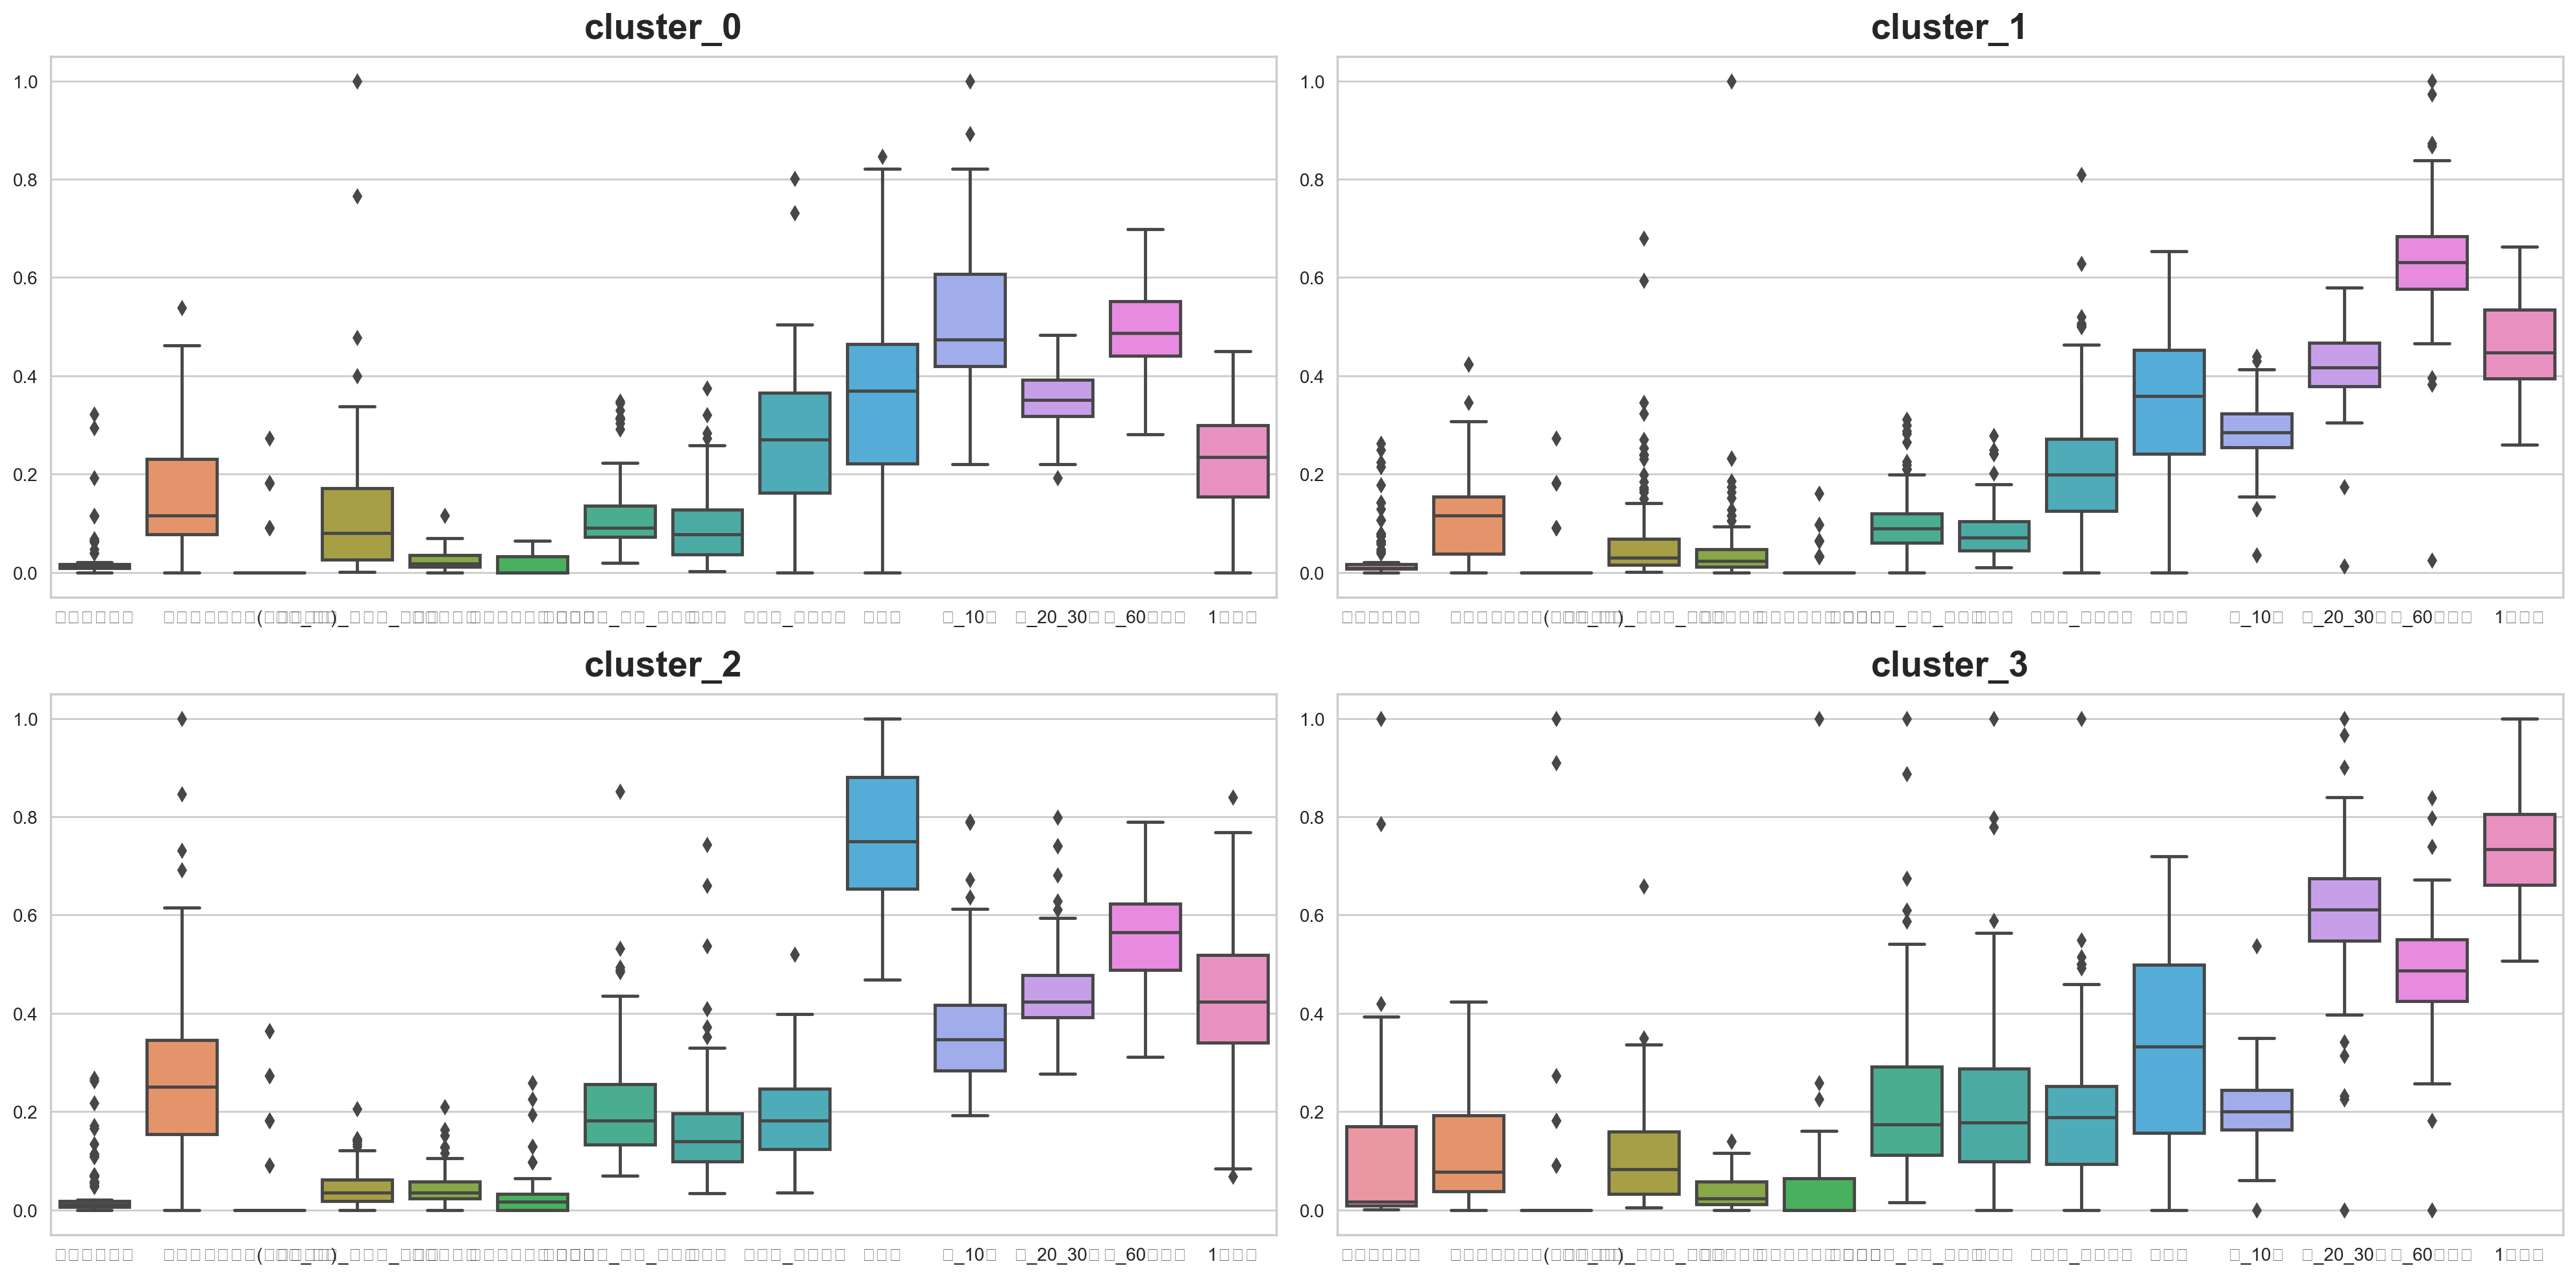

In [59]:
fig , axes = plt.subplots(nrows=2 ,ncols=2,
                          figsize=(20,10) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()
sns.boxplot(data=scaled_cluster_0, ax = ax[0])
ax[0].set_title("cluster_0", fontsize= 20)

sns.boxplot(data=scaled_cluster_1, ax = ax[1])
ax[1].set_title("cluster_1", fontsize= 20)

sns.boxplot(data=scaled_cluster_2, ax = ax[2])
ax[2].set_title("cluster_2", fontsize= 20)

sns.boxplot(data=scaled_cluster_3, ax = ax[3])
ax[3].set_title("cluster_3", fontsize= 20)

plt.show()

In [60]:
# 클러스터링 레이블을 붙인 전체 데이터셋 만들기(row)
cluster_0['cluster'] = 0
cluster_1['cluster'] = 1
cluster_2['cluster'] = 2
cluster_3['cluster'] = 3

result_w_original = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3])

In [61]:
# 클러스터링 레이블을 붙인 전체 데이터셋 만들기(scaled)
scaled_cluster_0['cluster'] = 0
scaled_cluster_1['cluster'] = 1
scaled_cluster_2['cluster'] = 2
scaled_cluster_3['cluster'] = 3

result_w_scaled = pd.concat([scaled_cluster_0, scaled_cluster_1, scaled_cluster_2, scaled_cluster_3])

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_f

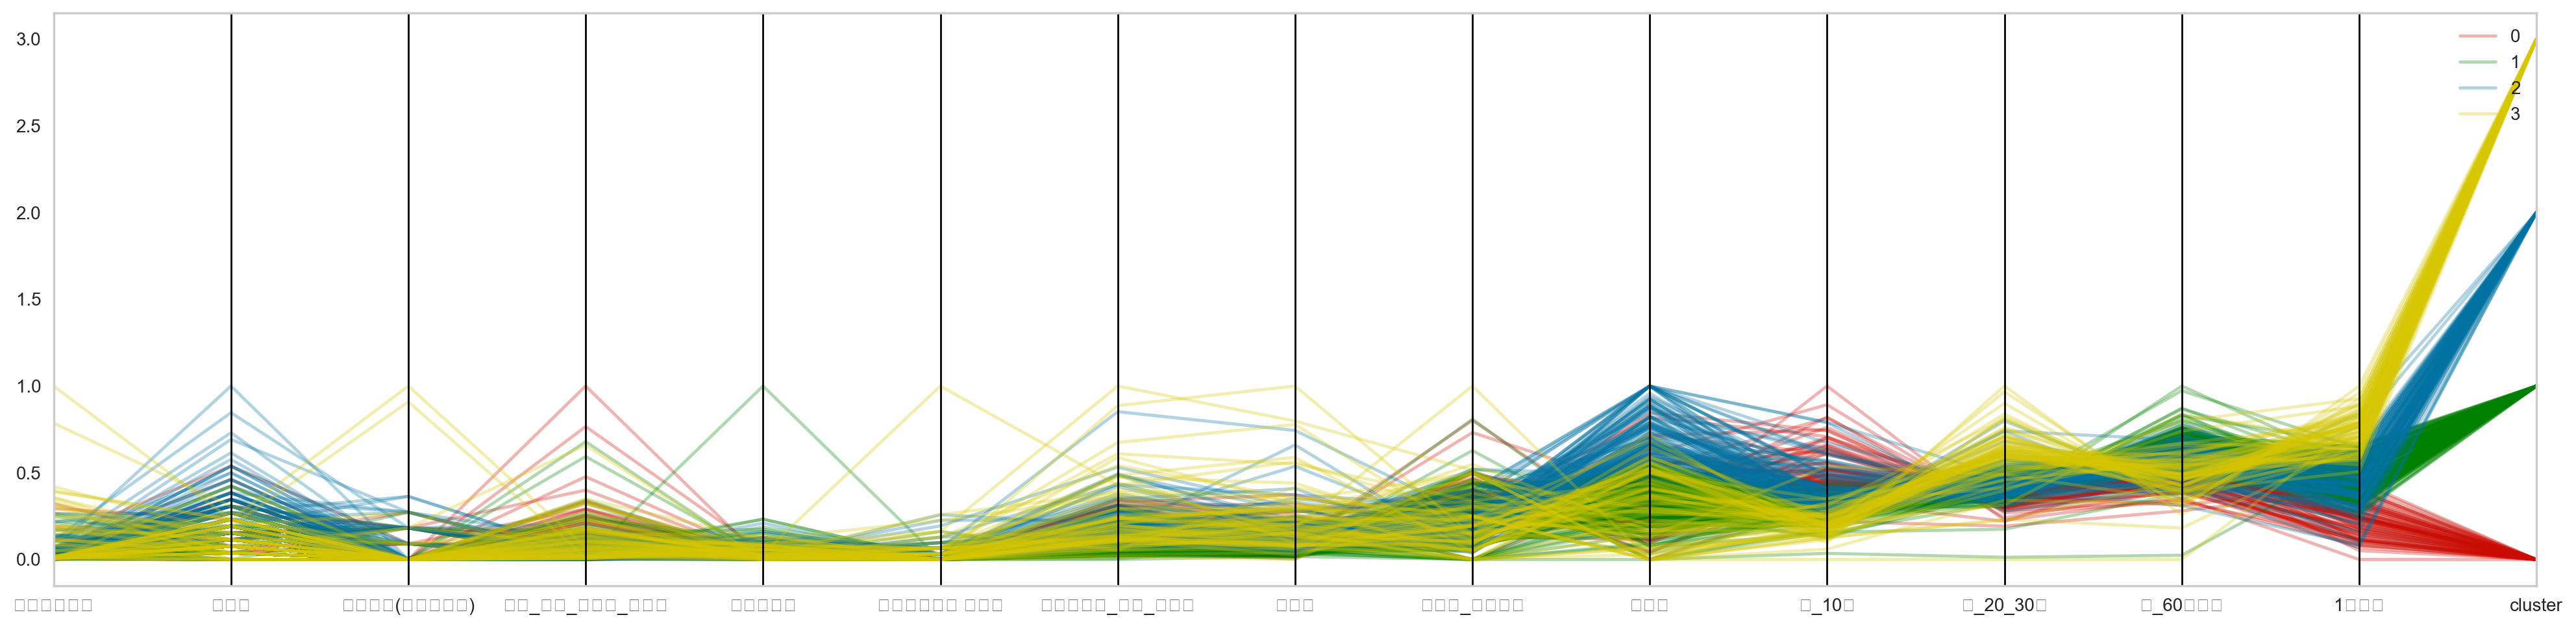

In [62]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,5))
parallel_coordinates(result_w_scaled, class_column='cluster', cols=result_w_scaled.columns, color=['r', 'green', 'b', 'y'], alpha=0.3)
plt.show()

In [63]:
list0 = cluster_0.index.to_list()
list1 = cluster_1.index.to_list()
list2 = cluster_2.index.to_list()
list3 = cluster_3.index.to_list()

In [64]:
tmp = pd.DataFrame(index=[0,1,2,3], data=[list0, list1, list2, list3]).T
tmp.to_csv('./data/test.csv', index=None)
tmp.to_excel('./data/test.xlsx')

클러스터링 이후, 주성분 feature 분포 시각화

In [65]:
def histplot(data, row_num, col_num) :
    fig, ax = plt.subplots(ncols = col_num, figsize = (18,4))
    rep = int(len(data.columns) / col_num)
    
    for i in range(col_num) :
        sns.kdeplot(data.iloc[:, row_num + (rep * i)], ax = ax[i])
        ax[i].set_title(data.iloc[:, row_num + (rep * i)].name)

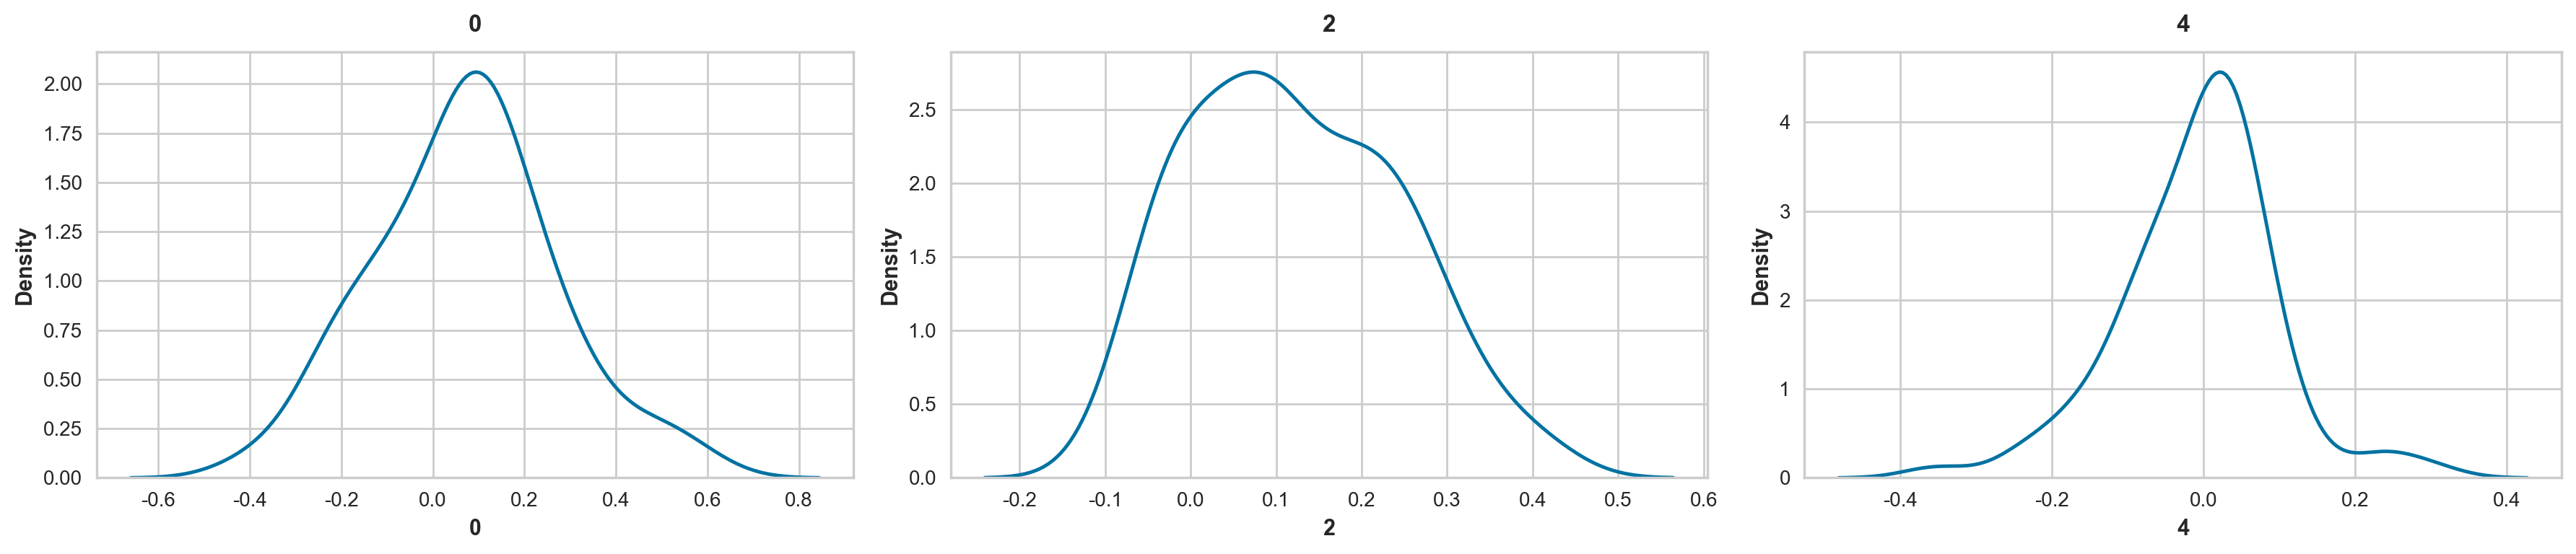

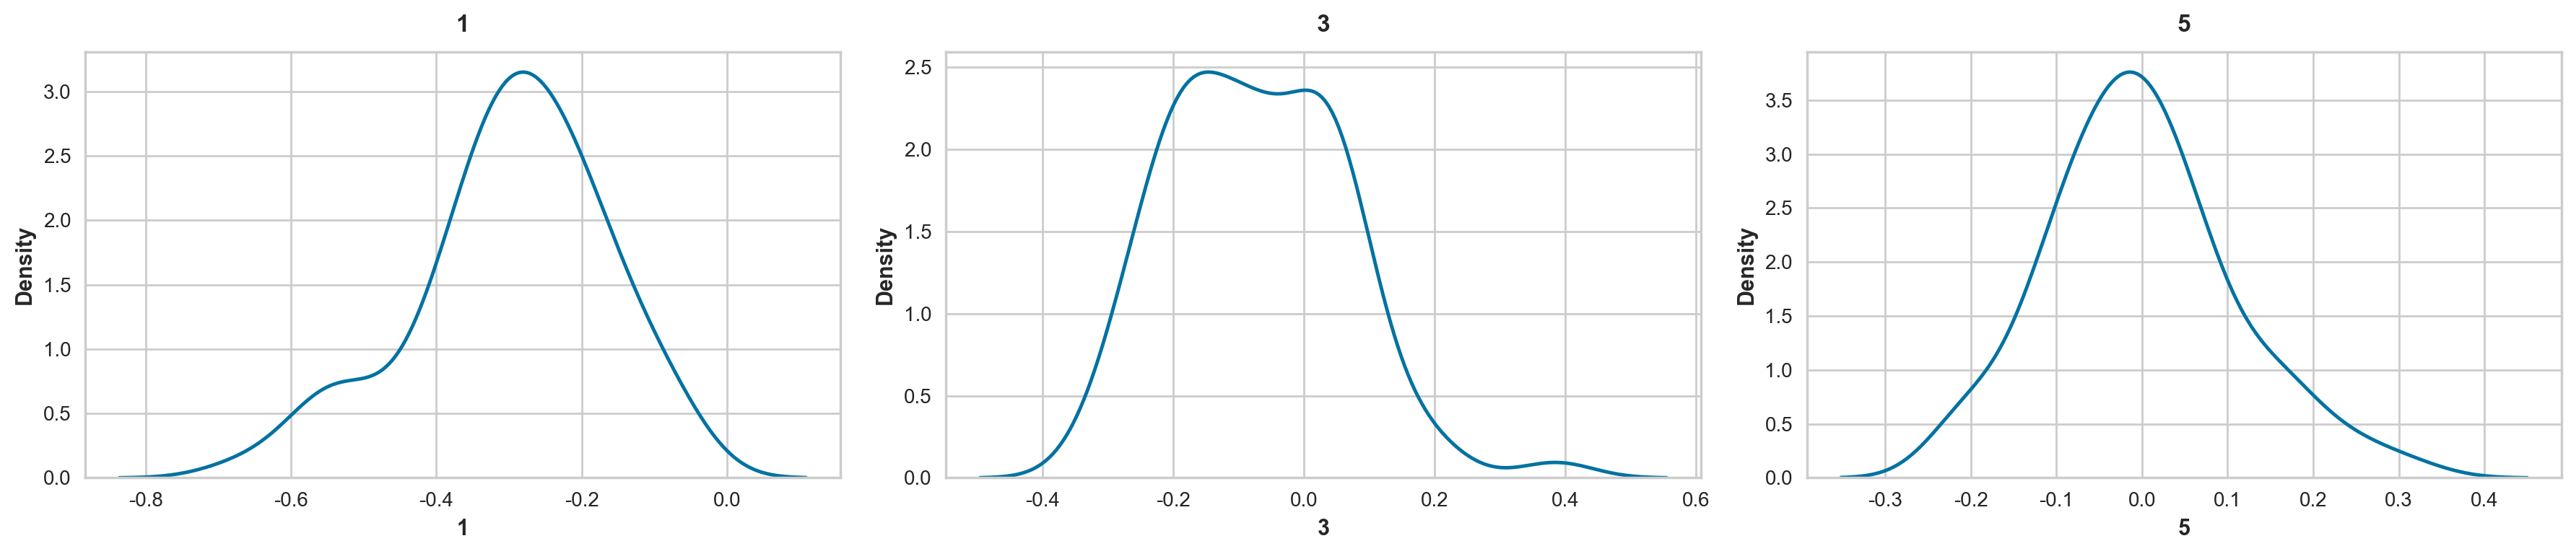

In [66]:
first_group = pca_result[pca_result['cluster'] == 0]

for row_num in range(2) :
    histplot(first_group.drop(['cluster'], axis = 1), row_num, 3)

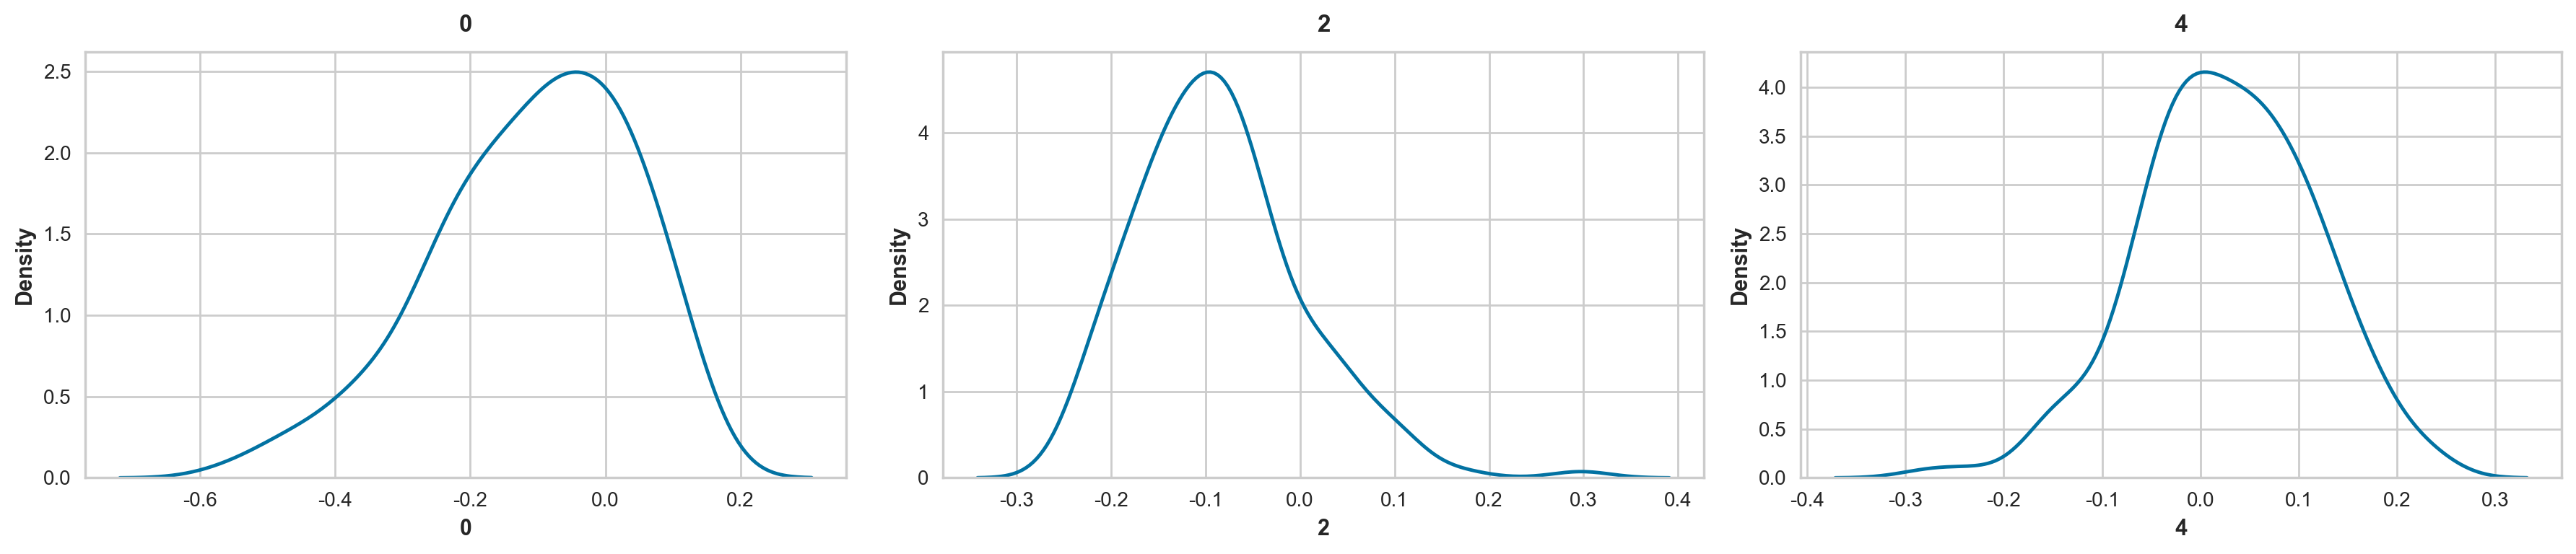

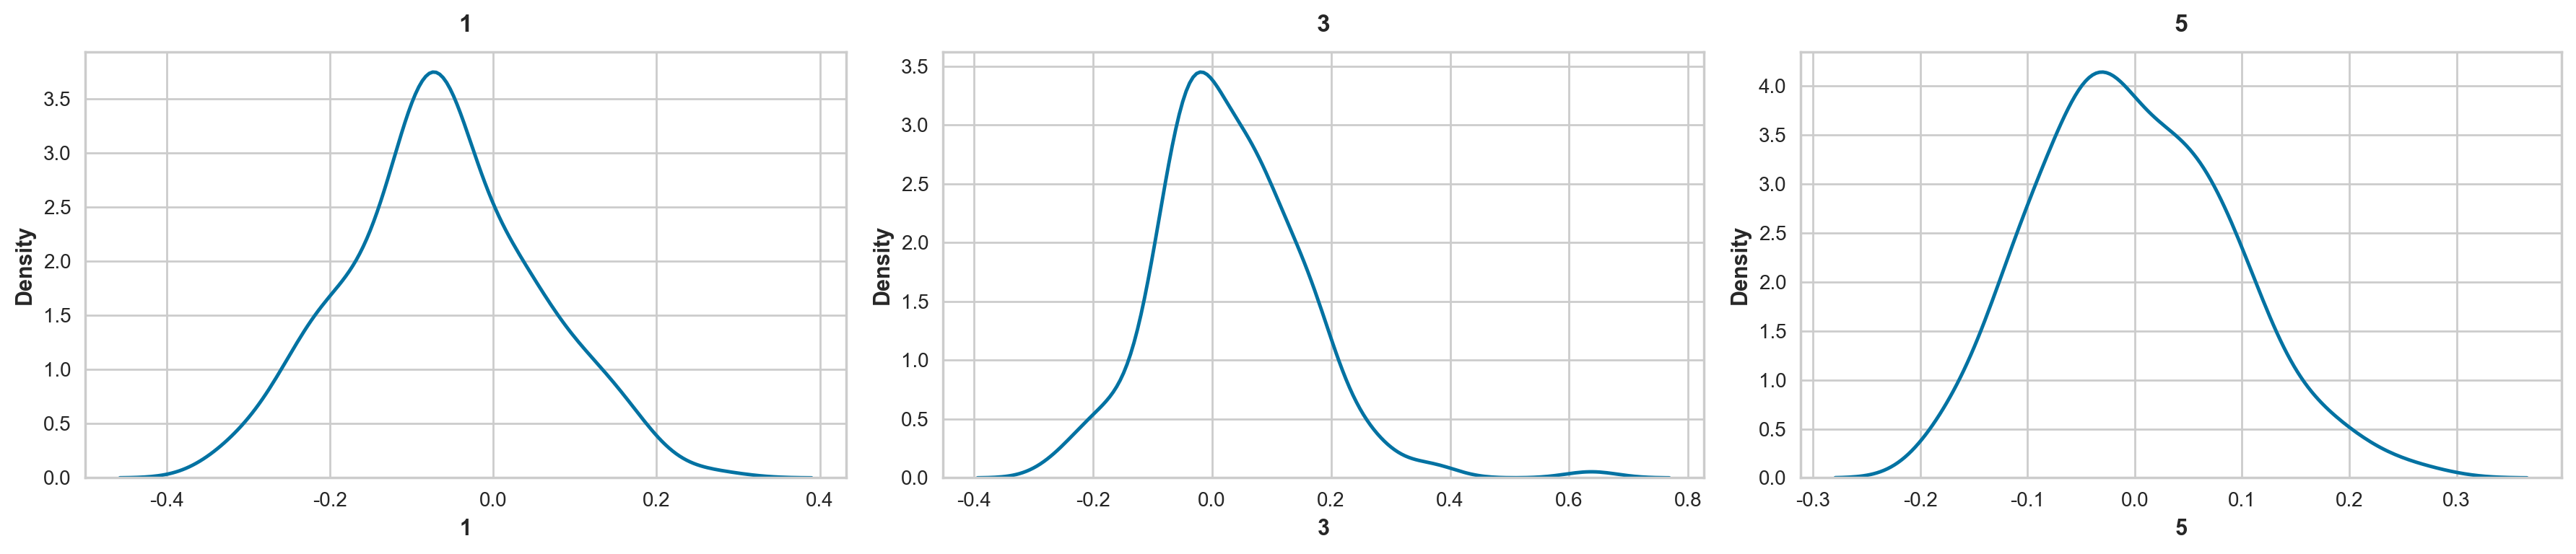

In [67]:
second_group = pca_result[pca_result['cluster'] == 1]

for row_num in range(2) :
    histplot(second_group.drop(['cluster'], axis = 1), row_num, 3)

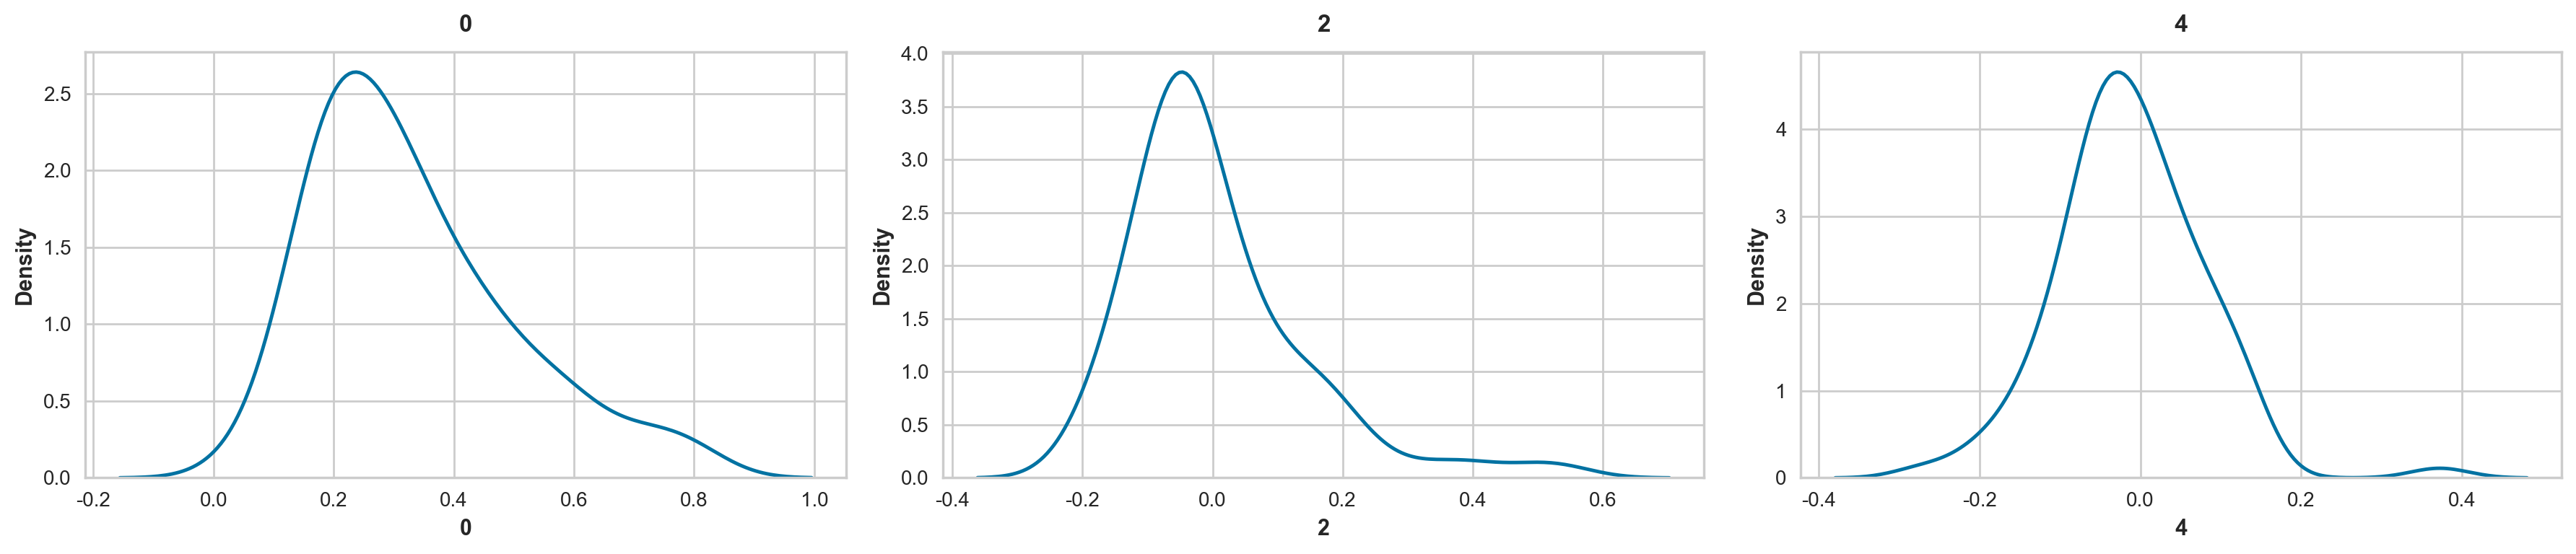

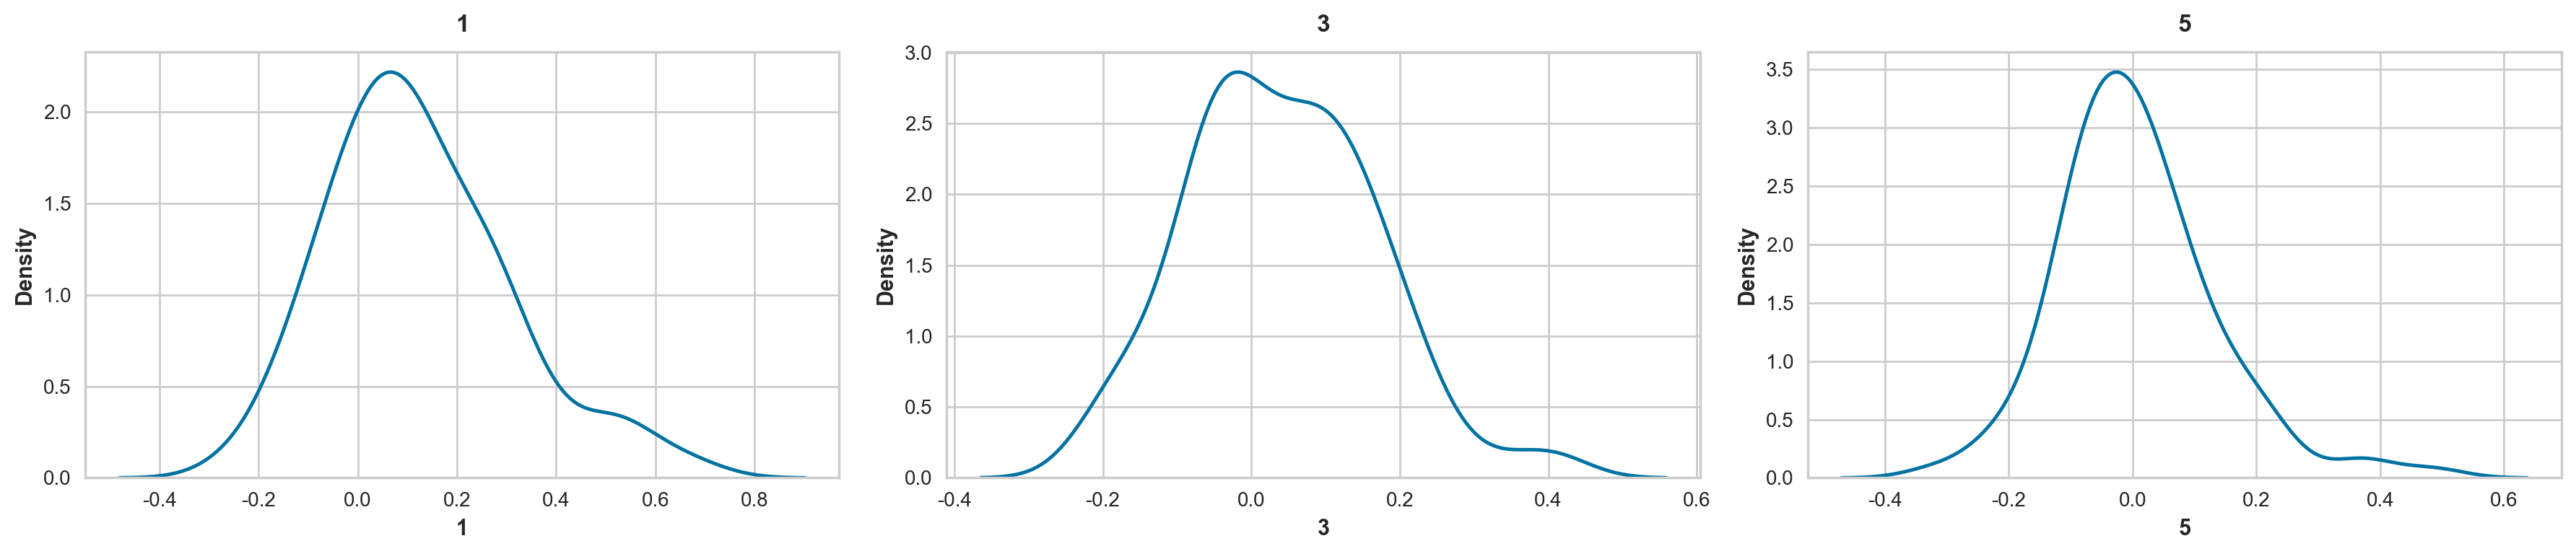

In [68]:
third_group = pca_result[pca_result['cluster'] == 2]

for row_num in range(2) :
    histplot(third_group.drop(['cluster'], axis = 1), row_num, 3)

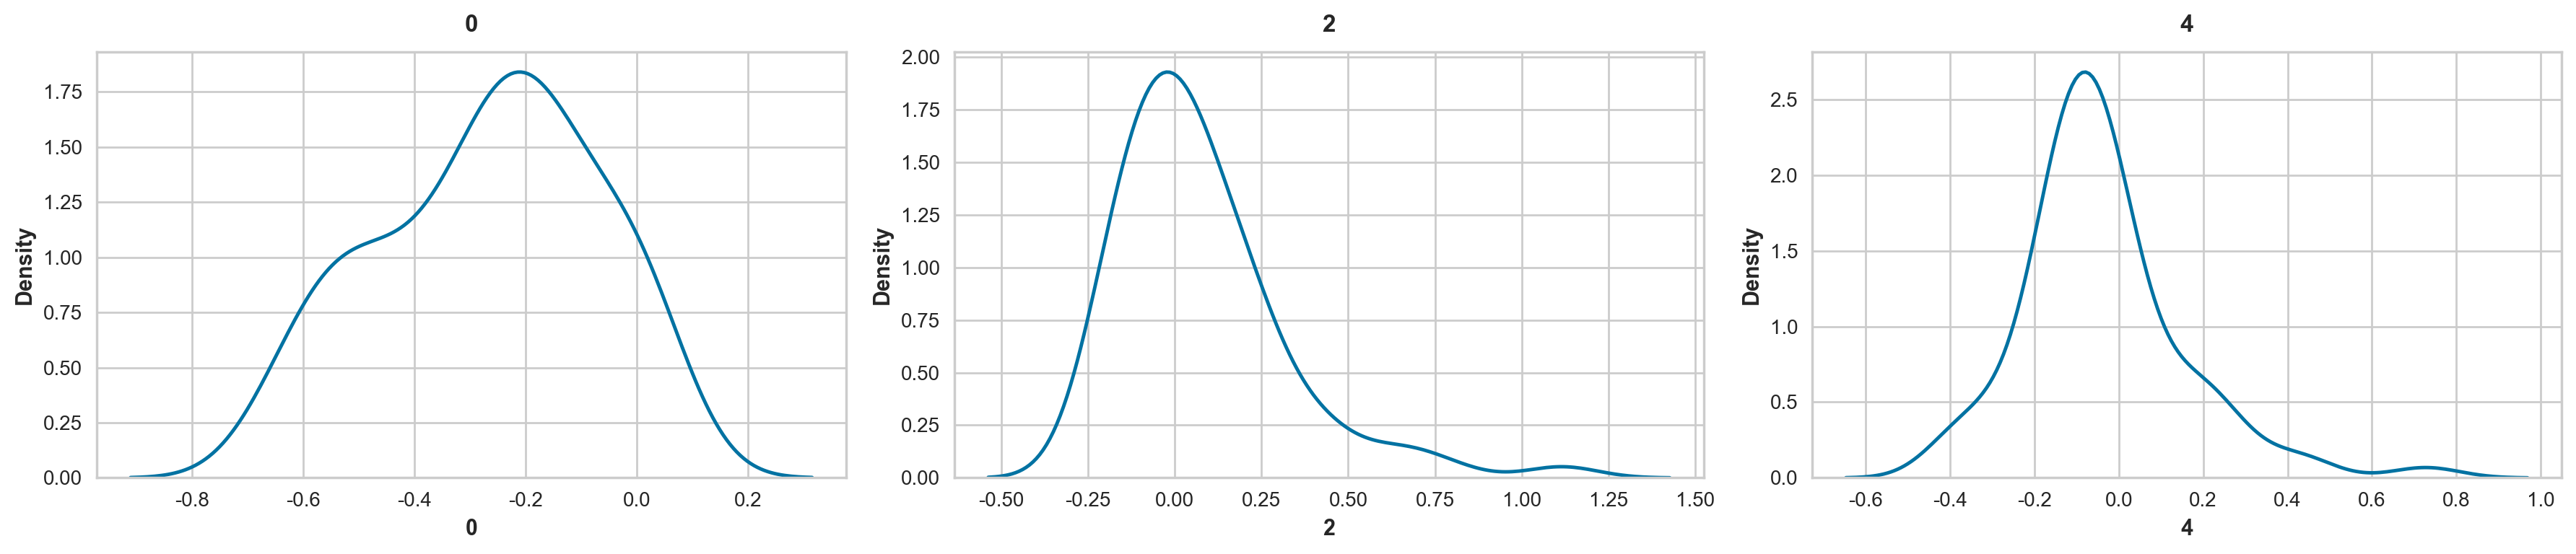

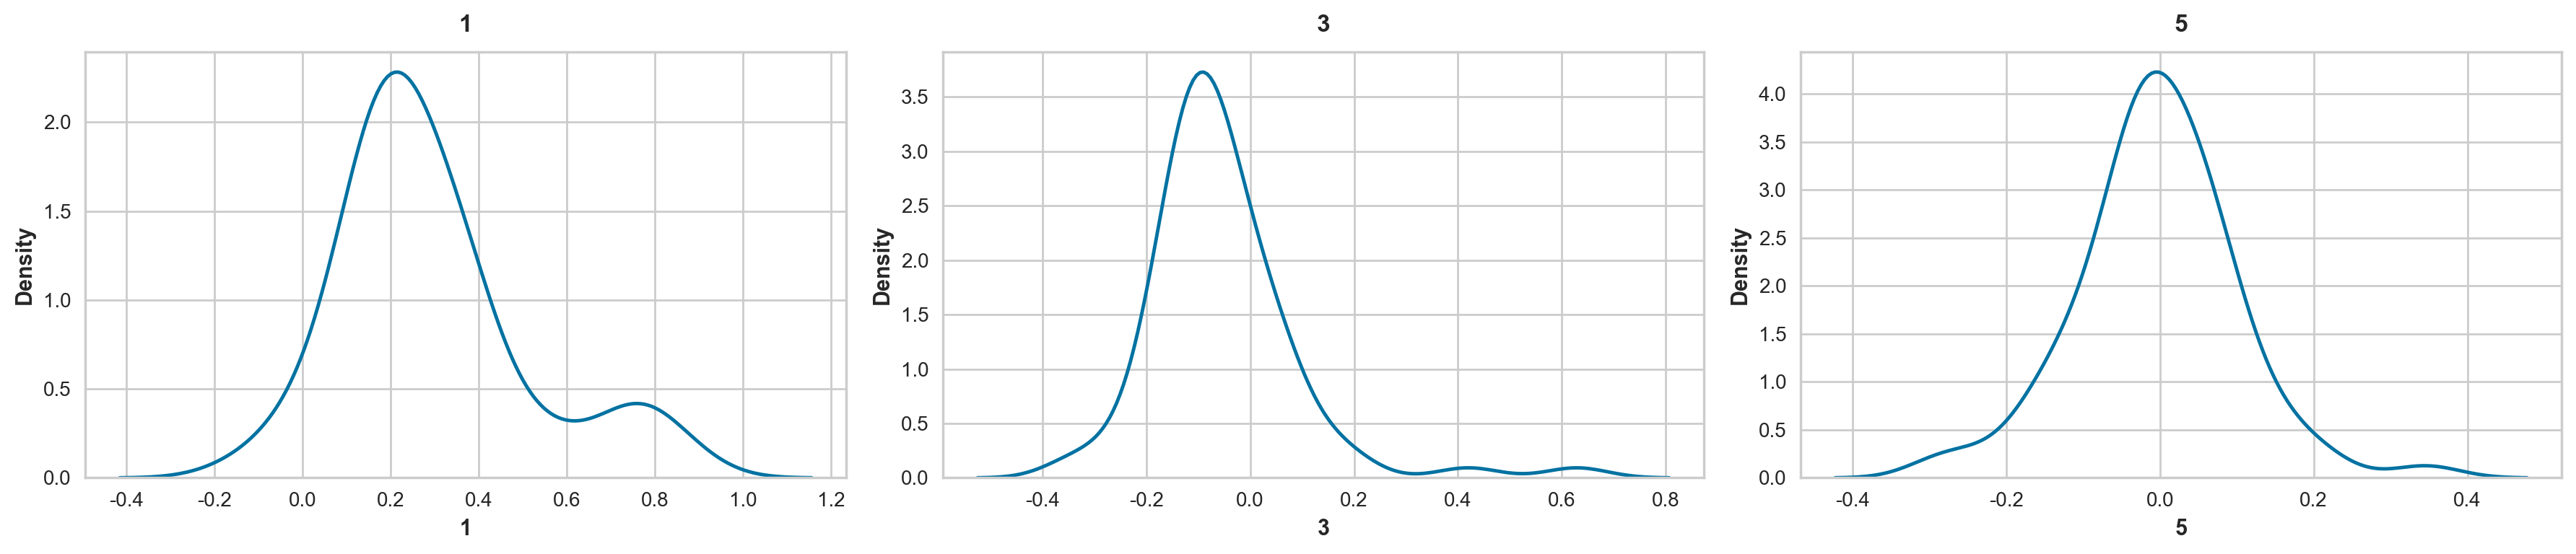

In [69]:
fourth_group = pca_result[pca_result['cluster'] == 3]

for row_num in range(2) :
    histplot(fourth_group.drop(['cluster'], axis = 1), row_num, 3)

clustering 결과 ->  classification -> feature importance 탐색

In [70]:
df_0 = cluster_0.copy()
df_0['cluster'] = 1

for i in [cluster_1, cluster_2, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_0 = pd.concat([df_0, tmp], axis=0)

In [71]:
df_1 = cluster_1.copy()
df_1['cluster'] = 1

for i in [cluster_0, cluster_2, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_1 = pd.concat([df_1, tmp], axis=0)

In [72]:
df_2 = cluster_2.copy()
df_2['cluster'] = 1

for i in [cluster_0, cluster_1, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_2 = pd.concat([df_2, tmp], axis=0)

In [73]:
df_3 = cluster_3.copy()
df_3['cluster'] = 1

for i in [cluster_0, cluster_1, cluster_2]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_3 = pd.concat([df_3, tmp], axis=0)

In [74]:
# print(df['Cluster'].value_counts())
# df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 2:0})
# print("\n", df["Binary Cluster 0"].value_counts())

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(df_0[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_0["cluster"].values)

# 가장 중요한 피처의 인덱스 구하기
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# 가장 중요한 피처의 이름과 weight 구하기
most_important_features = np.take_along_axis(
    np.array(df_0.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('총_10대', 0.26184383185235377),
 ('1인세대', 0.2501512879020436),
 ('총_20_30대', 0.12038578367917444),
 ('인구수', 0.08056348210219066),
 ('총_60대이상', 0.05956194900821224)]

In [76]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_1[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_1["cluster"].values)

# 가장 중요한 피처의 인덱스 구하기
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# 가장 중요한 피처의 이름과 weight 구하기
most_important_features = np.take_along_axis(
    np.array(df_1.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('인구수', 0.16108251109489533),
 ('총_60대이상', 0.14666649966274348),
 ('총_10대', 0.1393061478120586),
 ('1인세대', 0.13756484537041416),
 ('승하차인원_버스_지하철', 0.09639141307446367)]

In [77]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_2[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_2["cluster"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
    np.array(df_2.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('인구수', 0.4961474292746197),
 ('공원수', 0.11042571406709299),
 ('승하차인원_버스_지하철', 0.09733685689100283),
 ('총_10대', 0.04828762513599307),
 ('카페수', 0.046132072124590716)]

In [78]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_3[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_3["cluster"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
    np.array(df_3.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('1인세대', 0.3264162911707692),
 ('총_20_30대', 0.23897571140705767),
 ('총_10대', 0.11637463897322356),
 ('인구수', 0.058045348194527696),
 ('미세먼지지수', 0.05691199205686827)]

### kmeans centroid 와 벡터간 거리 계산

In [84]:
kmeans.cluster_centers_[0]

array([ 0.07141843, -0.29727122,  0.12185668, -0.073126  , -0.00813568,
       -0.00177339])

In [201]:
pca_cluster_0 = pca_result[pca_result['cluster'] == 0]
pca_cluster_1 = pca_result[pca_result['cluster'] == 1]
pca_cluster_2 = pca_result[pca_result['cluster'] == 2]
pca_cluster_3 = pca_result[pca_result['cluster'] == 3]

In [202]:
def calculate_distance(a, b):
    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i]) ** 2
    return distance ** 0.5

In [210]:
for idx in pca_cluster_0.index:
    tmp = pca_cluster_0.copy()
    tmp.pop('cluster')
    distance = calculate_distance(kmeans.cluster_centers_[0], pca_cluster_0.loc[idx, :].to_list())
    pca_cluster_0.loc[idx, 'distance'] = distance

for idx in pca_cluster_1.index:
    tmp = pca_cluster_1.copy()
    tmp.pop('cluster')
    distance = calculate_distance(kmeans.cluster_centers_[0], pca_cluster_1.loc[idx, :].to_list())
    pca_cluster_1.loc[idx, 'distance'] = distance

for idx in pca_cluster_2.index:
    tmp = pca_cluster_2.copy()
    tmp.pop('cluster')
    distance = calculate_distance(kmeans.cluster_centers_[0], pca_cluster_2.loc[idx, :].to_list())
    pca_cluster_2.loc[idx, 'distance'] = distance

for idx in pca_cluster_3.index:
    tmp = pca_cluster_3.copy()
    tmp.pop('cluster')
    distance = calculate_distance(kmeans.cluster_centers_[0], pca_cluster_3.loc[idx, :].to_list())
    pca_cluster_3.loc[idx, 'distance'] = distance    

In [213]:
pca_cluster_0.sort_values('distance')[:5]

0         1         2         3         4         5  cluster  \
행정동명                                                                         
송파2동   0.079815 -0.244630  0.027826  0.015311 -0.039013 -0.010445        0   
남가좌1동  0.088593 -0.312289  0.017162 -0.167120  0.047328  0.041055        0   
하계2동   0.164587 -0.306063 -0.004596 -0.099306 -0.003715 -0.035986        0   
방이1동  -0.056980 -0.250338  0.119408 -0.080721 -0.087399  0.055004        0   
방배3동   0.100324 -0.300655  0.057266  0.061770  0.054492  0.053401        0   

       distance  
행정동명             
송파2동   0.143294  
남가좌1동  0.158830  
하계2동   0.163167  
방이1동   0.168104  
방배3동   0.173730

In [214]:
pca_cluster_1.sort_values('distance')[:5]

0         1         2         3         4         5  cluster  \
행정동명                                                                         
정릉1동   0.022124 -0.182489 -0.063050 -0.104653  0.094154 -0.040041        1   
난향동   -0.074551 -0.279860 -0.081153 -0.091219  0.085006 -0.018922        1   
수색동   -0.140537 -0.248463 -0.048924 -0.033940  0.023648 -0.062987        1   
염리동   -0.068223 -0.089344  0.040944 -0.173210 -0.074127 -0.022553        1   
신대방1동  0.108979 -0.085585 -0.051873 -0.020648 -0.075303 -0.026754        1   

       distance  
행정동명             
정릉1동   0.250433  
난향동    0.268551  
수색동    0.287691  
염리동    0.289972  
신대방1동  0.290334

In [215]:
pca_cluster_2.sort_values('distance')[:5]

0         1         2         3         4         5  cluster  \
행정동명                                                                        
창4동   0.232008 -0.126554 -0.001760  0.054288 -0.019501 -0.009370        2   
자양3동  0.238315 -0.110774 -0.043482 -0.032892 -0.041627 -0.097014        2   
월곡1동  0.235371 -0.097399 -0.051326 -0.030304  0.074255  0.004105        2   
응암2동  0.283967 -0.121471 -0.065084 -0.079995 -0.033868  0.006966        2   
신정7동  0.307256 -0.189967 -0.062932  0.018322 -0.002307 -0.077182        2   

      distance  
행정동명            
창4동   0.294340  
자양3동  0.319035  
월곡1동  0.324774  
응암2동  0.334388  
신정7동  0.339652

In [216]:
pca_cluster_3.sort_values('distance')[:5]

0         1         2         3         4         5  cluster  \
행정동명                                                                         
양평2동  -0.020774  0.157010  0.055745 -0.119382 -0.095250 -0.041679        3   
대치4동  -0.261723 -0.003261  0.287097 -0.247042 -0.070606 -0.007150        3   
구로5동  -0.253796  0.123504  0.062825 -0.058777 -0.028850 -0.014961        3   
원효로1동 -0.160246  0.170086  0.021923 -0.084611 -0.124997  0.058906        3   
삼선동    0.018111  0.221598  0.103760 -0.022374  0.163489 -0.057031        3   

       distance  
행정동명             
양평2동   0.480170  
대치4동   0.508830  
구로5동   0.535826  
원효로1동  0.547310  
삼선동    0.554507